In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

In [868]:
df = pd.read_csv('ObservationData_2018.csv')
df

,country,indicator,Unit,Date,Value
0,Afghanistan,Happiness Score,"Scale, 0=Low ; 10=High",2018,3.203300
1,Afghanistan,Dystopia (1.88) + residual,score,2018,1.793060
2,Afghanistan,Whisker-high,score,2018,3.277512
3,Afghanistan,Whisker-low,score,2018,3.129088
4,Afghanistan,GDP per capita,score,2018,0.349631
5,Afghanistan,Social support,score,2018,0.517003
6,Afghanistan,Healthy life expectancy,score,2018,0.360616
7,Afghanistan,Freedom to make life choices,score,2018,0.000000
8,Afghanistan,Generosity,score,2018,0.158151
9,Afghanistan,Perceptions of corruption,score,2018,0.024875


In [680]:
# rearrange the database schema
df1 = df.pivot_table(index='country', columns='indicator', values='Value')
df1

indicator,Confidence in national government,Dystopia (1.88) + residual,Freedom to make life choices,GDP per capita,"GINI index (World Bank estimate), average 2000-16",Generosity,Happiness Score,Healthy life expectancy,Healthy life expectancy at birth,Life Ladder,...,"Most people can be trusted, WVS round 2010-2014",Negative affect,Perceptions of corruption,Positive affect,Social support,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Whisker-high,Whisker-low,"gini of household income reported in Gallup, by wp5-year"
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.364666,1.793060,0.186768,0.349631,NaN,0.036632,3.2033,0.360616,52.599998,2.694303,...,NaN,0.404904,0.476240,0.424125,0.512260,1.408344,0.522712,3.277512,3.129088,0.290681
Albania,0.435338,1.461002,0.603776,0.947101,0.303250,0.091772,4.7186,0.874208,68.699997,5.004403,...,NaN,0.318997,0.463107,0.713300,0.765636,2.640531,0.527642,4.829273,4.607927,0.456174
Algeria,NaN,1.992307,0.334457,1.001515,0.276000,-0.049886,5.2113,0.785282,65.900002,5.043086,...,0.179286,0.292946,0.436566,0.591043,0.979135,1.973943,0.391416,5.303558,5.119041,0.667872
Argentina,0.261352,2.096293,0.658266,1.091516,0.460938,-0.070508,6.0863,0.880779,68.800003,5.792797,...,0.193531,0.320502,0.452476,0.820310,1.165710,2.472559,0.426833,6.191539,5.981061,0.405356
Armenia,0.670828,1.397996,0.545134,0.850109,0.319250,-0.027038,4.5594,0.814928,66.900002,5.062449,...,0.109136,0.454840,0.370311,0.581488,0.934694,2.102111,0.415236,4.651613,4.467187,0.406403
Australia,0.468837,2.094287,0.736600,1.371545,0.342750,0.234672,7.2280,1.035532,73.599998,7.176993,...,0.518140,0.187456,0.347305,0.759019,1.244047,1.750283,0.243874,7.314588,7.141413,0.429814
Austria,0.488679,2.377548,0.718093,1.375542,0.302692,0.147560,7.2460,1.015777,73.000000,7.396002,...,NaN,0.226059,0.374641,0.752350,1.193445,1.551940,0.209835,7.312841,7.179158,0.299504
Azerbaijan,0.834372,1.679619,0.561961,1.042803,0.211000,-0.108162,5.2077,0.768873,65.500000,5.167995,...,0.147933,0.191392,0.371673,0.592575,0.964282,1.863302,0.360546,5.278987,5.136412,0.260410
Bahrain,NaN,1.698076,0.535697,1.361811,NaN,0.254980,6.1994,0.871097,NaN,NaN,...,NaN,NaN,0.110144,NaN,1.367559,NaN,NaN,6.323913,6.074887,NaN


In [681]:
df1.columns

Index(['Confidence in national government', 'Dystopia (1.88) + residual',
       'Freedom to make life choices', 'GDP per capita',
       'GINI index (World Bank estimate), average 2000-16', 'Generosity',
       'Happiness Score', 'Healthy life expectancy',
       'Healthy life expectancy at birth', 'Life Ladder', 'Log GDP per capita',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS round 2010-2014', 'Negative affect',
       'Perceptions of corruption', 'Positive affect', 'Social support',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year', 'Whisker-high',
       'Whisker-low',
       'gini of household income reported in Gallup, by wp5-year'],
 

In [682]:
# dropping columns not needed for analysis
df2 = df1.drop(columns=['Dystopia (1.88) + residual', 
                        'GINI index (World Bank estimate), average 2000-16', 
                        'Healthy life expectancy at birth',
                        'Log GDP per capita',
                        'Most people can be trusted, WVS round 1981-1984',
                       'Most people can be trusted, WVS round 1989-1993',
                       'Most people can be trusted, WVS round 1994-1998',
                       'Most people can be trusted, WVS round 1999-2004',
                       'Most people can be trusted, WVS round 2005-2009',
                       'Most people can be trusted, WVS round 2010-2014', 
                        'Standard deviation of ladder by country-year',
                        'Standard deviation/Mean of ladder by country-year',
                        'Whisker-high',
                        'Whisker-low',
                       'gini of household income reported in Gallup, by wp5-year'])

In [683]:
# renaming and rearranging columns
df2.columns = ['Govt_Conf', 'Life_Freedom', 'GDP_per_capita', 'Generosity', 'Happiness_Score', 'Healthy_Life_Exp', 'Life_Satis', 'Neg_Emotion', 'Percep_Corruption', 'Pos_Emotion', 'Social_Support']
df2 = df2[['Happiness_Score', 'Life_Satis', 'Pos_Emotion', 'Neg_Emotion', 'GDP_per_capita', 'Healthy_Life_Exp', 'Life_Freedom', 'Social_Support', 'Govt_Conf','Generosity', 'Percep_Corruption' ]]

In [684]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
Happiness_Score      156 non-null float64
Life_Satis           136 non-null float64
Pos_Emotion          135 non-null float64
Neg_Emotion          135 non-null float64
GDP_per_capita       156 non-null float64
Healthy_Life_Exp     156 non-null float64
Life_Freedom         156 non-null float64
Social_Support       156 non-null float64
Govt_Conf            123 non-null float64
Generosity           156 non-null float64
Percep_Corruption    156 non-null float64
dtypes: float64(11)
memory usage: 14.6+ KB


In [873]:
# dropping NaN values
df2 = df2.dropna(axis=0)
df2.isnull().sum()
df2

,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
country,,,,,,,,,,,
Afghanistan,3.2033,2.694303,0.424125,0.404904,0.349631,0.360616,0.186768,0.512260,0.364666,0.036632,0.476240
Albania,4.7186,5.004403,0.713300,0.318997,0.947101,0.874208,0.603776,0.765636,0.435338,0.091772,0.463107
Argentina,6.0863,5.792797,0.820310,0.320502,1.091516,0.880779,0.658266,1.165710,0.261352,-0.070508,0.452476
Armenia,4.5594,5.062449,0.581488,0.454840,0.850109,0.814928,0.545134,0.934694,0.670828,-0.027038,0.370311
Australia,7.2280,7.176993,0.759019,0.187456,1.371545,1.035532,0.736600,1.244047,0.468837,0.234672,0.347305
Austria,7.2460,7.396002,0.752350,0.226059,1.375542,1.015777,0.718093,1.193445,0.488679,0.147560,0.374641
Azerbaijan,5.2077,5.167995,0.592575,0.191392,1.042803,0.768873,0.561961,0.964282,0.834372,-0.108162,0.371673
Bangladesh,4.4558,4.499217,0.541345,0.361238,0.562270,0.722729,0.714431,0.816901,0.831693,0.063882,0.422411
Belarus,5.3225,5.233770,0.450333,0.235729,1.067027,0.788669,0.439234,1.185006,0.421279,-0.043866,0.430024


In [879]:
df2.to_csv('Happiness_2018.csv')

# Initial Observations

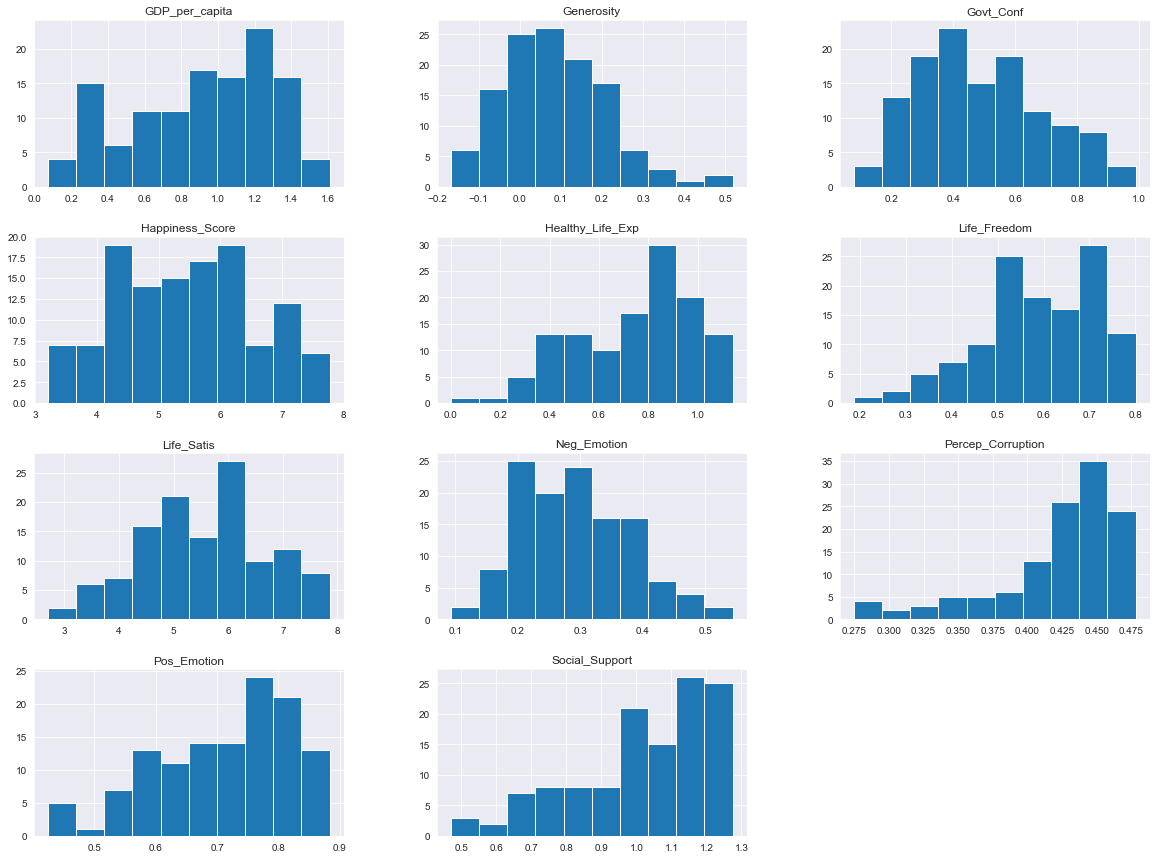

In [686]:
# examining the distributions of each variable
hist = df2.hist(figsize=[20,15])

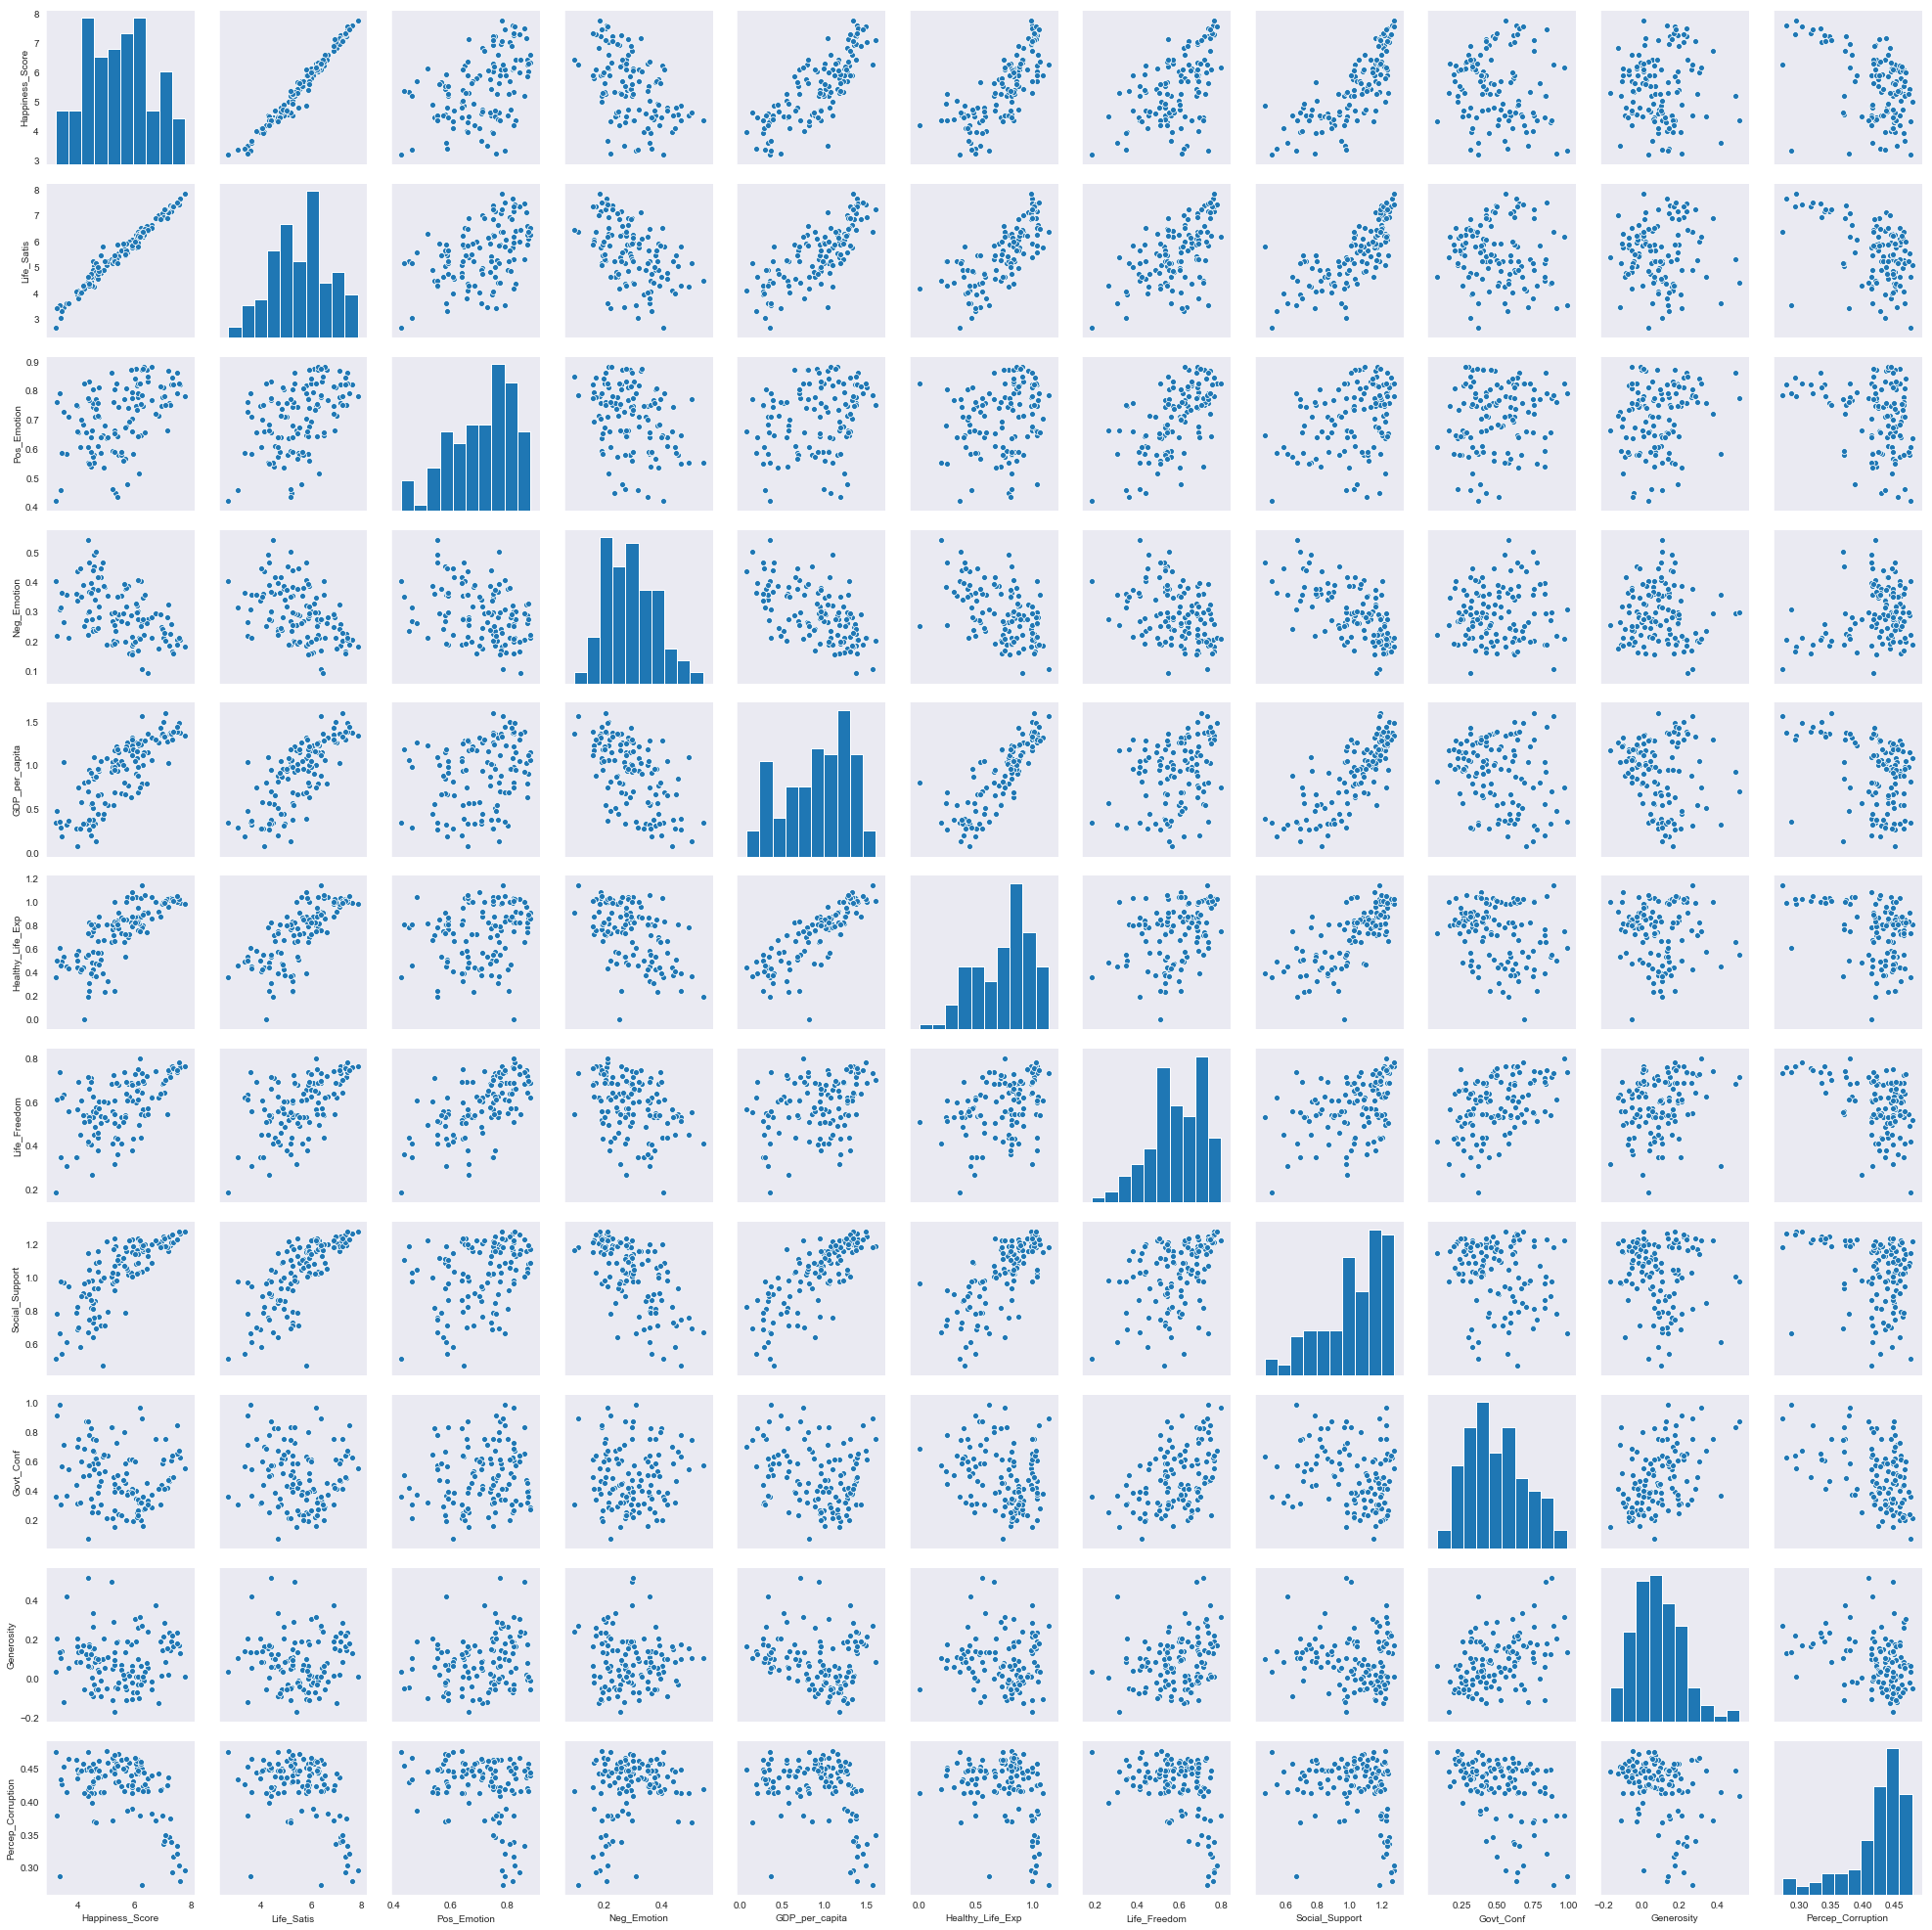

In [687]:
# an overview of visualization of correlations between each variable
sns.set_style("dark")
sns.pairplot(df2);

In [124]:
# confirming with numerical results
df2.corr()

,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
Happiness_Score,1.000000,0.983854,0.446021,-0.493679,0.802650,0.770150,0.540387,0.777050,-0.149961,0.011562,-0.448329
Life_Satis,0.983854,1.000000,0.458098,-0.460546,0.773622,0.744814,0.546879,0.742498,-0.124590,0.017697,-0.451507
Pos_Emotion,0.446021,0.458098,1.000000,-0.355279,0.254648,0.224509,0.633371,0.356454,0.160485,0.219824,-0.296681
Neg_Emotion,-0.493679,-0.460546,-0.355279,1.000000,-0.599368,-0.509395,-0.364153,-0.640798,0.028680,-0.039609,0.269091
GDP_per_capita,0.802650,0.773622,0.254648,-0.599368,1.000000,0.846474,0.364653,0.788579,-0.213036,-0.157579,-0.346213
Healthy_Life_Exp,0.770150,0.744814,0.224509,-0.509395,0.846474,1.000000,0.376232,0.729897,-0.259820,-0.059582,-0.335306
Life_Freedom,0.540387,0.546879,0.633371,-0.364153,0.364653,0.376232,1.000000,0.411774,0.434119,0.267116,-0.455496
Social_Support,0.777050,0.742498,0.356454,-0.640798,0.788579,0.729897,0.411774,1.000000,-0.223952,-0.102328,-0.254309
Govt_Conf,-0.149961,-0.124590,0.160485,0.028680,-0.213036,-0.259820,0.434119,-0.223952,1.000000,0.439623,-0.448697
Generosity,0.011562,0.017697,0.219824,-0.039609,-0.157579,-0.059582,0.267116,-0.102328,0.439623,1.000000,-0.283864


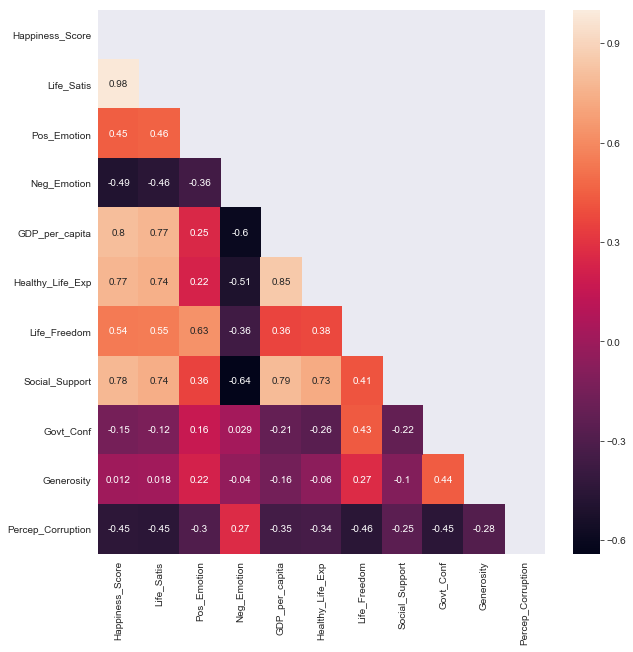

In [125]:
fig, ax = plt.subplots(figsize=(10,10))
mask = np.zeros_like(df2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df2.corr(), mask=mask, annot=True);

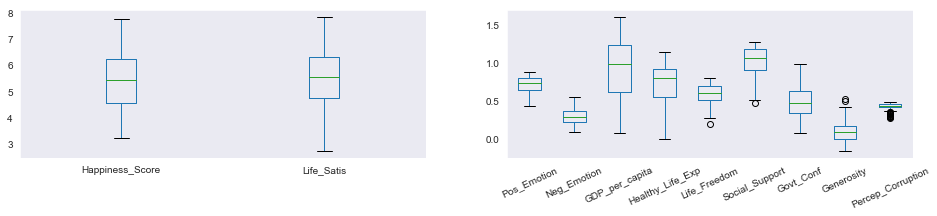

In [657]:
# looking to see if there are significant outliers
sns.set_style("darkgrid")

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1 = df2.iloc[:,0:2].boxplot(grid=False, fontsize=10, ax=ax1)
ax2 = df2.iloc[:,2:].boxplot(grid=False, rot=25, fontsize=10, ax=ax2)


In [885]:
import plotly.graph_objs as go
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

data = dict(type = 'choropleth',
           colorscale = 'YlGnBu', 
           locations = df2.index,
           locationmode = 'country names',
           z = df2['Happiness_Score'], 
           colorbar = {'title':'Happiness Score'})
layout = dict(title = 'Mapping Happiness',
              titlefont = dict(size=20),
             geo = dict(showframe = False,
                        showcoastlines = True,
                       projection = {'type': 'natural earth'}))
happiness_map = go.Figure(data = [data], layout=layout)
iplot(happiness_map)

In [884]:
# create new director in python folder as 'images'
# write the interactive plotly image to WebP

import plotly.io as pio
import os

if not os.path.exists('images'):
    os.mkdir('images')
    
pio.write_image(happiness_map, 'images/Happiness_Map.svg')

# Breaking it Down

In [134]:
happiest = df2.sort_values('Happiness_Score', ascending=False).head(10)
happiest

,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
country,,,,,,,,,,,
Finland,7.7689,7.858107,0.781546,0.181781,1.340243,0.986145,0.766851,1.274715,0.555102,0.010487,0.295759
Denmark,7.6001,7.648786,0.821423,0.206053,1.383439,0.996019,0.763897,1.265407,0.632478,0.133956,0.280540
Norway,7.5539,7.444262,0.827414,0.211862,1.487767,1.028123,0.781964,1.273755,0.679503,0.173516,0.304542
Netherlands,7.4876,7.463097,0.861977,0.204794,1.396020,0.999314,0.738530,1.230673,0.656541,0.238988,0.334268
Switzerland,7.4802,7.508587,0.792226,0.191520,1.452245,1.051989,0.748964,1.228285,0.849979,0.179916,0.321938
Sweden,7.3433,7.374792,0.822676,0.160755,1.386577,1.009203,0.758073,1.208993,0.494396,0.168299,0.317999
New Zealand,7.3075,7.370286,0.845363,0.167951,1.302586,1.025635,0.767223,1.255548,0.642461,0.223296,0.293431
Canada,7.2781,7.175497,0.823669,0.259398,1.364896,1.038812,0.764867,1.213730,0.610467,0.191493,0.339889
Austria,7.2460,7.396002,0.752350,0.226059,1.375542,1.015777,0.718093,1.193445,0.488679,0.147560,0.374641


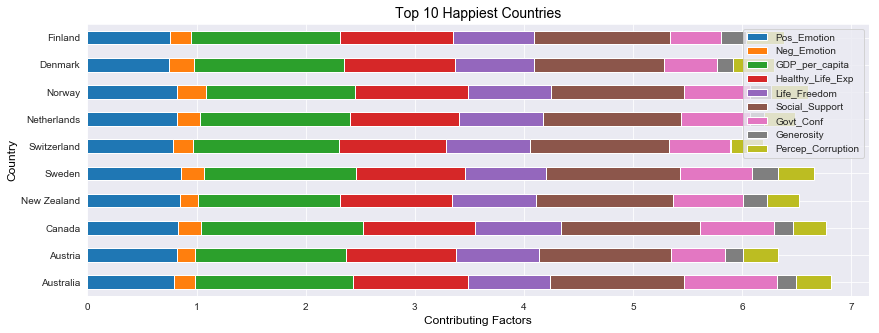

In [138]:
sns.set_style("darkgrid")
happiest.iloc[:,2:].sort_index(ascending=False).plot(kind='barh', stacked=True, figsize=[14,5])

bars = list(reversed(happiest.index))
y_pos = np.arange(len(bars))
plt.yticks(y_pos,bars)

plt.xlabel("Contributing Factors",color="black",fontsize=12)
plt.ylabel("Country",color="black",fontsize=12)
plt.title("Top 10 Happiest Countries",color="black",fontsize=14)

plt.show()


In [139]:
unhappiest = df2.sort_values('Happiness_Score', ascending=True).head(10)
unhappiest

,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
country,,,,,,,,,,,
Afghanistan,3.2033,2.694303,0.424125,0.404904,0.349631,0.360616,0.186768,0.512260,0.364666,0.036632,0.476240
Tanzania,3.2307,3.445023,0.762089,0.221005,0.475854,0.498773,0.612146,0.780093,0.914648,0.209025,0.379350
Rwanda,3.3338,3.561047,0.793368,0.308199,0.359488,0.613996,0.739401,0.663610,0.988120,0.136881,0.287318
Yemen,3.3798,3.057514,0.461114,0.314870,0.286911,0.462540,0.347898,0.976045,0.308151,0.108465,0.434966
Malawi,3.4098,3.334634,0.586300,0.364894,0.190973,0.495386,0.621170,0.543990,0.572985,0.141578,0.427574
Botswana,3.4884,3.461366,0.729643,0.267084,1.040945,0.538402,0.636532,0.970127,0.718788,-0.117046,0.453491
Haiti,3.5969,3.614928,0.584113,0.358720,0.322931,0.449383,0.308661,0.613148,0.367897,0.420242,0.415342
Zimbabwe,3.6632,3.616480,0.710119,0.211726,0.365785,0.433069,0.561757,0.944692,0.550508,0.056339,0.466750
Madagascar,3.9327,4.070587,0.752341,0.362014,0.274076,0.554548,0.349633,0.790810,0.442306,0.087343,0.464829


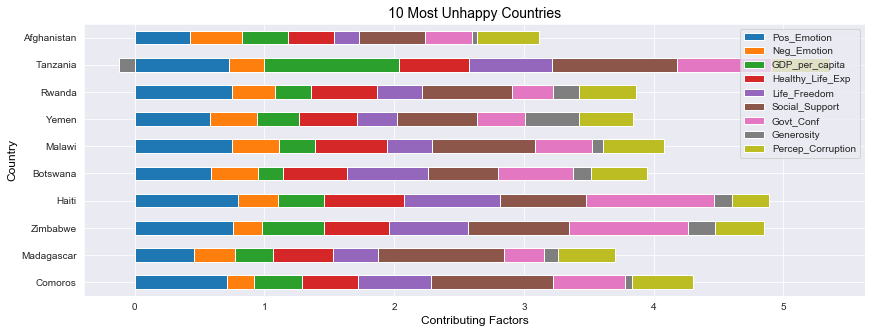

In [140]:
sns.set_style("darkgrid")
unhappiest.iloc[:,2:].sort_index(ascending=False).plot(kind='barh', stacked=True, figsize=[14,5])

bars = list(reversed(unhappiest.index))
y_pos = np.arange(len(bars))
plt.yticks(y_pos,bars)

plt.xlabel("Contributing Factors",color="black",fontsize=12)
plt.ylabel("Country",color="black",fontsize=12)
plt.title("10 Most Unhappy Countries",color="black",fontsize=14)

plt.show()

# Understanding Target Variable

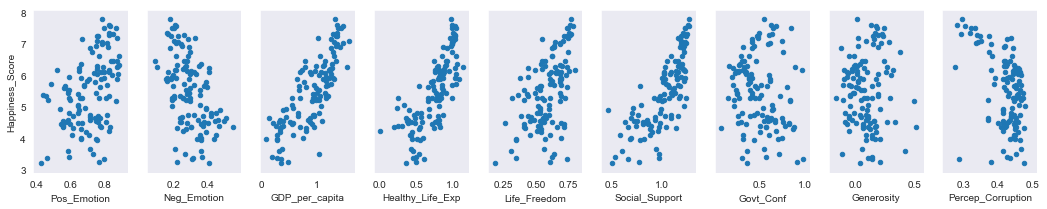

In [880]:
# visualize the relationship between the preditors and the target(happiness score) using scatterplots
fig, axs = plt.subplots(1, 9, sharey=True, figsize=(18, 3))

for i, j in enumerate(['Pos_Emotion', 'Neg_Emotion', 'GDP_per_capita', 'Healthy_Life_Exp', 'Life_Freedom', 'Social_Support', 'Govt_Conf','Generosity', 'Percep_Corruption' ]):
    df2.plot(kind='scatter', x=j, y='Happiness_Score', ax=axs[i])

plt.show()
# strongest correlations are detected between Happiness Score and GDP, Health/life expectancy, and social support

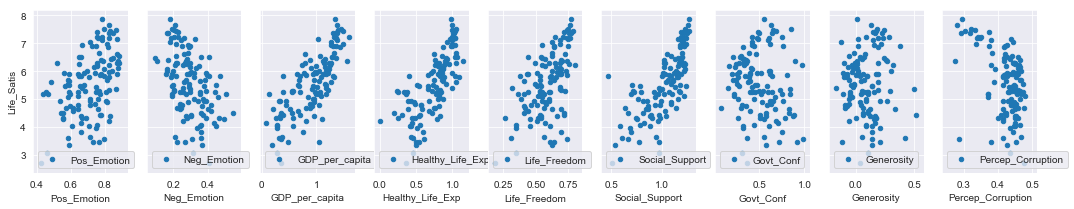

In [146]:
# do the same for life statisfaction
fig, axs = plt.subplots(1, 9, sharey=True, figsize=(18, 3))

for i, j in enumerate(['Pos_Emotion', 'Neg_Emotion', 'GDP_per_capita', 'Healthy_Life_Exp', 'Life_Freedom', 'Social_Support', 'Govt_Conf','Generosity', 'Percep_Corruption' ]):
    df2.plot(kind='scatter', x=j, y='Life_Satis', ax=axs[i], label=j)

plt.show()
# same observations for life satisfaction, although happiness score seems to be more correlated with these variables
# i will use happiness score as the target variable

# Baseline R^2

In [625]:
## find the baseline R2
y = df2['Happiness_Score']
df_variables = df2.iloc[:,2:]

regression = LinearRegression()
crossvalidation = KFold(n_splits=4, shuffle=True, random_state=1)   # 4 folds gave highest R2

baseline = np.mean(cross_val_score(regression, df_variables, y, scoring="r2", cv=crossvalidation))
baseline

0.771402128297962

In [660]:
# double checking regression with original variables
f = 'Happiness_Score~Pos_Emotion+Neg_Emotion+GDP_per_capita+Healthy_Life_Exp+Life_Freedom+Social_Support+Govt_Conf+Generosity+Percep_Corruption'

model = ols(formula=f, data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     53.97
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           7.90e-37
Time:                        14:41:50   Log-Likelihood:                -85.826
No. Observations:                 123   AIC:                             191.7
Df Residuals:                     113   BIC:                             219.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.7835      0.966      2.882      0.005       0.870       4.697
Pos_Emotion           0.9200      0.566      1.627      0.107      -0.200       2.040
Neg_Emotion           1.7143      0.704      2.434      0.017       0.319       3.110
GDP_per_capita        1.0813      0.272      3.982      0.000       0.543       1.619
Healthy_Life_Exp      0.4089      0.400      1.022      0.309      -0.384       1.202
Life_Freedom          2.0934      0.621      3.368      0.001       0.862       3.325
Social_Support        1.6485      0.438      3.766      0.000       0.781       2.516
Govt_Conf            -1.2658      0.367     -3.452      0.001      -1.992      -0.539
Generosity            0.5957      0.420      1.419      0.159      -0.236       1.427
Percep_Corruption    -4.9714      1.342     -3.705      0.000      -7.630      -2.313
==============================================================================
Omnibus:                        6.407   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.940
Skew:                          -0.468   Prob(JB):                       0.0513
Kurtosis:                       3.533   Cond. No.                         77.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [664]:
# taking out the variables with p-value > 0.05
# Pos_Emotion, Healthy_Life_Exp, Generosity

f = 'Happiness_Score~Neg_Emotion+GDP_per_capita+Life_Freedom+Social_Support+Govt_Conf+Percep_Corruption'

model = ols(formula=f, data=df2).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     77.57
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           2.87e-38
Time:                        14:42:39   Log-Likelihood:                -89.249
No. Observations:                 123   AIC:                             192.5
Df Residuals:                     116   BIC:                             212.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.6751      0.893      4.117      0.000       1.907       5.443
Neg_Emotion           1.4642      0.702      2.084      0.039       0.073       2.856
GDP_per_capita        1.1224      0.215      5.216      0.000       0.696       1.549
Life_Freedom          2.8411      0.510      5.567      0.000       1.830       3.852
Social_Support        1.7537      0.439      3.993      0.000       0.884       2.624
Govt_Conf            -1.3846      0.335     -4.133      0.000      -2.048      -0.721
Percep_Corruption    -5.7637      1.316     -4.380      0.000      -8.370      -3.158
==============================================================================
Omnibus:                        7.701   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.325
Skew:                          -0.550   Prob(JB):                       0.0257
Kurtosis:                       3.468   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking for Multicollinearity

In [887]:
correlation = abs(df2.corr()) > 0.75
correlation

,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
Happiness_Score,True,True,False,False,True,True,False,True,False,False,False
Life_Satis,True,True,False,False,True,False,False,False,False,False,False
Pos_Emotion,False,False,True,False,False,False,False,False,False,False,False
Neg_Emotion,False,False,False,True,False,False,False,False,False,False,False
GDP_per_capita,True,True,False,False,True,True,False,True,False,False,False
Healthy_Life_Exp,True,False,False,False,True,True,False,False,False,False,False
Life_Freedom,False,False,False,False,False,False,True,False,False,False,False
Social_Support,True,False,False,False,True,False,False,True,False,False,False
Govt_Conf,False,False,False,False,False,False,False,False,True,False,False
Generosity,False,False,False,False,False,False,False,False,False,True,False


In [206]:
correlation[correlation == 1].count()

Happiness_Score      5
Life_Satis           3
Pos_Emotion          1
Neg_Emotion          1
GDP_per_capita       5
Healthy_Life_Exp     3
Life_Freedom         1
Social_Support       3
Govt_Conf            1
Generosity           1
Percep_Corruption    1
dtype: int64

In [382]:
# deciding to keep GDP_per_capita as it is a highly correlated variable with happiness_score

# Checking for Interaction

In [627]:
# see how interactions improve my baseline
# listing all possible combos
from itertools import combinations
combinations = list(combinations(df2.iloc[:,2:], 2))
combinations

[('Pos_Emotion', 'Neg_Emotion'),
 ('Pos_Emotion', 'GDP_per_capita'),
 ('Pos_Emotion', 'Healthy_Life_Exp'),
 ('Pos_Emotion', 'Life_Freedom'),
 ('Pos_Emotion', 'Social_Support'),
 ('Pos_Emotion', 'Govt_Conf'),
 ('Pos_Emotion', 'Generosity'),
 ('Pos_Emotion', 'Percep_Corruption'),
 ('Neg_Emotion', 'GDP_per_capita'),
 ('Neg_Emotion', 'Healthy_Life_Exp'),
 ('Neg_Emotion', 'Life_Freedom'),
 ('Neg_Emotion', 'Social_Support'),
 ('Neg_Emotion', 'Govt_Conf'),
 ('Neg_Emotion', 'Generosity'),
 ('Neg_Emotion', 'Percep_Corruption'),
 ('GDP_per_capita', 'Healthy_Life_Exp'),
 ('GDP_per_capita', 'Life_Freedom'),
 ('GDP_per_capita', 'Social_Support'),
 ('GDP_per_capita', 'Govt_Conf'),
 ('GDP_per_capita', 'Generosity'),
 ('GDP_per_capita', 'Percep_Corruption'),
 ('Healthy_Life_Exp', 'Life_Freedom'),
 ('Healthy_Life_Exp', 'Social_Support'),
 ('Healthy_Life_Exp', 'Govt_Conf'),
 ('Healthy_Life_Exp', 'Generosity'),
 ('Healthy_Life_Exp', 'Percep_Corruption'),
 ('Life_Freedom', 'Social_Support'),
 ('Life_Freed

In [628]:
# find top 5 interactions by R^2 value 

data = df2.iloc[:,2:].copy()
interactions = []

for i in combinations:
    data["interaction"] = data[i[0]] * data[i[1]]
    score = np.mean(cross_val_score(regression, data, y, scoring="r2", cv=crossvalidation))
    if score > baseline: interactions.append((i[0], i[1], round(score,3)))
            
print("Top 5 interactions: %s" %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:5])


Top 5 interactions: [('Healthy_Life_Exp', 'Social_Support', 0.807), ('Social_Support', 'Percep_Corruption', 0.795), ('Neg_Emotion', 'Social_Support', 0.785), ('Govt_Conf', 'Percep_Corruption', 0.784), ('Pos_Emotion', 'Healthy_Life_Exp', 0.783)]


In [629]:
# ('Healthy_Life_Exp', 'Social_Support', 0.807)
# ('Social_Support', 'Percep_Corruption', 0.795)
# ('Neg_Emotion', 'Social_Support', 0.785)
# ('Govt_Conf', 'Percep_Corruption', 0.784)
# ('Pos_Emotion', 'Healthy_Life_Exp', 0.783)

# looks like Social_Support is a major confounding variable
# I should split up Social_Support into 3 categories, at the 33% and 67% levels

In [630]:
# first, turn the column into an array with shape of (123,)
social_support = np.asarray(df2[['Social_Support']]).reshape(len(df2[['Social_Support']]))
social_support

array([0.51225954, 0.76563621, 1.16570958, 0.93469444, 1.24404734,
       1.1934453 , 0.96428248, 0.81690055, 1.18500572, 1.21706086,
       0.47050263, 1.01817659, 1.02374792, 0.97012684, 1.16020173,
       1.21863919, 0.86038807, 0.79346794, 1.21372986, 0.6718497 ,
       1.12941918, 1.1403273 , 0.68921843, 0.70974556, 1.15849659,
       1.0877946 , 1.02432954, 1.20829701, 1.26540694, 1.13173136,
       1.08172533, 1.03280306, 1.23026374, 0.88661051, 1.27471539,
       1.19675747, 0.98385549, 0.81192949, 0.64143428, 1.18687353,
       0.97487521, 1.05529225, 0.72957939, 0.61314848, 1.03161454,
       0.70148939, 1.00599152, 0.75791436, 1.24556482, 1.18211892,
       1.20033816, 0.71419448, 1.15251458, 1.22218591, 0.84488809,
       1.02742708, 1.16801101, 1.18899184, 1.02678347, 0.8243334 ,
       1.22231168, 1.19049957, 1.071417  , 0.79081002, 0.54399011,
       0.98030436, 0.89828959, 1.22561529, 0.98440859, 1.15525141,
       1.09057233, 1.11003593, 1.23607618, 1.10834935, 0.86207

In [631]:
# second, split the array into 3 groups
high_ss = df2[social_support > np.percentile(social_support, 67)]
med_ss = df2[(social_support > np.percentile(social_support, 33)) & (social_support <= np.percentile(social_support, 67))]
low_ss = df2[social_support <= np.percentile(social_support, 33)]

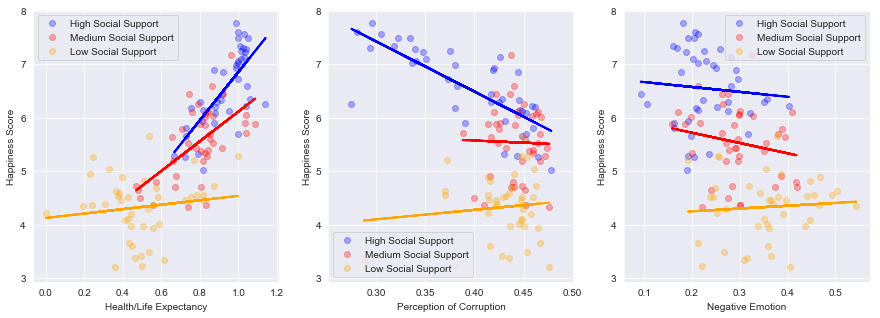

In [632]:
# build the interaction function for all variables that interacts with social_support

def build_interaction_ss(varname, description):
    regression_h = LinearRegression()
    regression_m = LinearRegression()
    regression_l = LinearRegression()
    regression_h.fit(high_ss[varname].values.reshape(-1, 1), high_ss["Happiness_Score"])
    regression_m.fit(med_ss[varname].values.reshape(-1, 1), med_ss["Happiness_Score"])
    regression_l.fit(low_ss[varname].values.reshape(-1, 1), low_ss["Happiness_Score"])

    # Make predictions using the testing set
    pred_high = regression_h.predict(high_ss[varname].values.reshape(-1, 1))
    pred_med = regression_m.predict(med_ss[varname].values.reshape(-1, 1))
    pred_low = regression_l.predict(low_ss[varname].values.reshape(-1, 1))

    # The coefficients
#     print(regression_h.coef_)
#     print(regression_m.coef_)
#     print(regression_l.coef_)

    # Plot outputs
    plt.scatter(high_ss[varname], high_ss["Happiness_Score"],  color='blue', alpha = 0.3, label = "High Social Support")
    plt.scatter(med_ss[varname], med_ss["Happiness_Score"],  color='red', alpha = 0.3, label = "Medium Social Support")
    plt.scatter(low_ss[varname], low_ss["Happiness_Score"],  color='orange', alpha = 0.3, label = "Low Social Support")

    plt.plot(low_ss[varname], pred_low,  color='orange', linewidth=2)
    plt.plot(med_ss[varname], pred_med,  color='red', linewidth=2)
    plt.plot(high_ss[varname], pred_high,  color='blue', linewidth=2)
    plt.ylabel("Happiness Score")
    plt.xlabel(description)
    plt.legend()

f = plt.figure(figsize=(15,5))
plt.subplot(131)
ax1 = build_interaction_ss('Healthy_Life_Exp', "Health/Life Expectancy")
plt.subplot(132)
ax2 = build_interaction_ss('Percep_Corruption', "Perception of Corruption")
plt.subplot(133)
ax3 = build_interaction_ss('Neg_Emotion', "Negative Emotion")

# The effect on Happiness Ccore are more strongly affected by level of Health/Life Expectancy in High Social Support environments than low social support environments
# So the effect of Health/Life Expectancy on Happiness varies, depending on level of Social Support

# The effect on Happiness Ccore are more strongly affected by Perception of Corruption in High Social Support environments than low social support environments
# So the effect of Perception of Corruption on Happiness varies, depending on level of Social Support

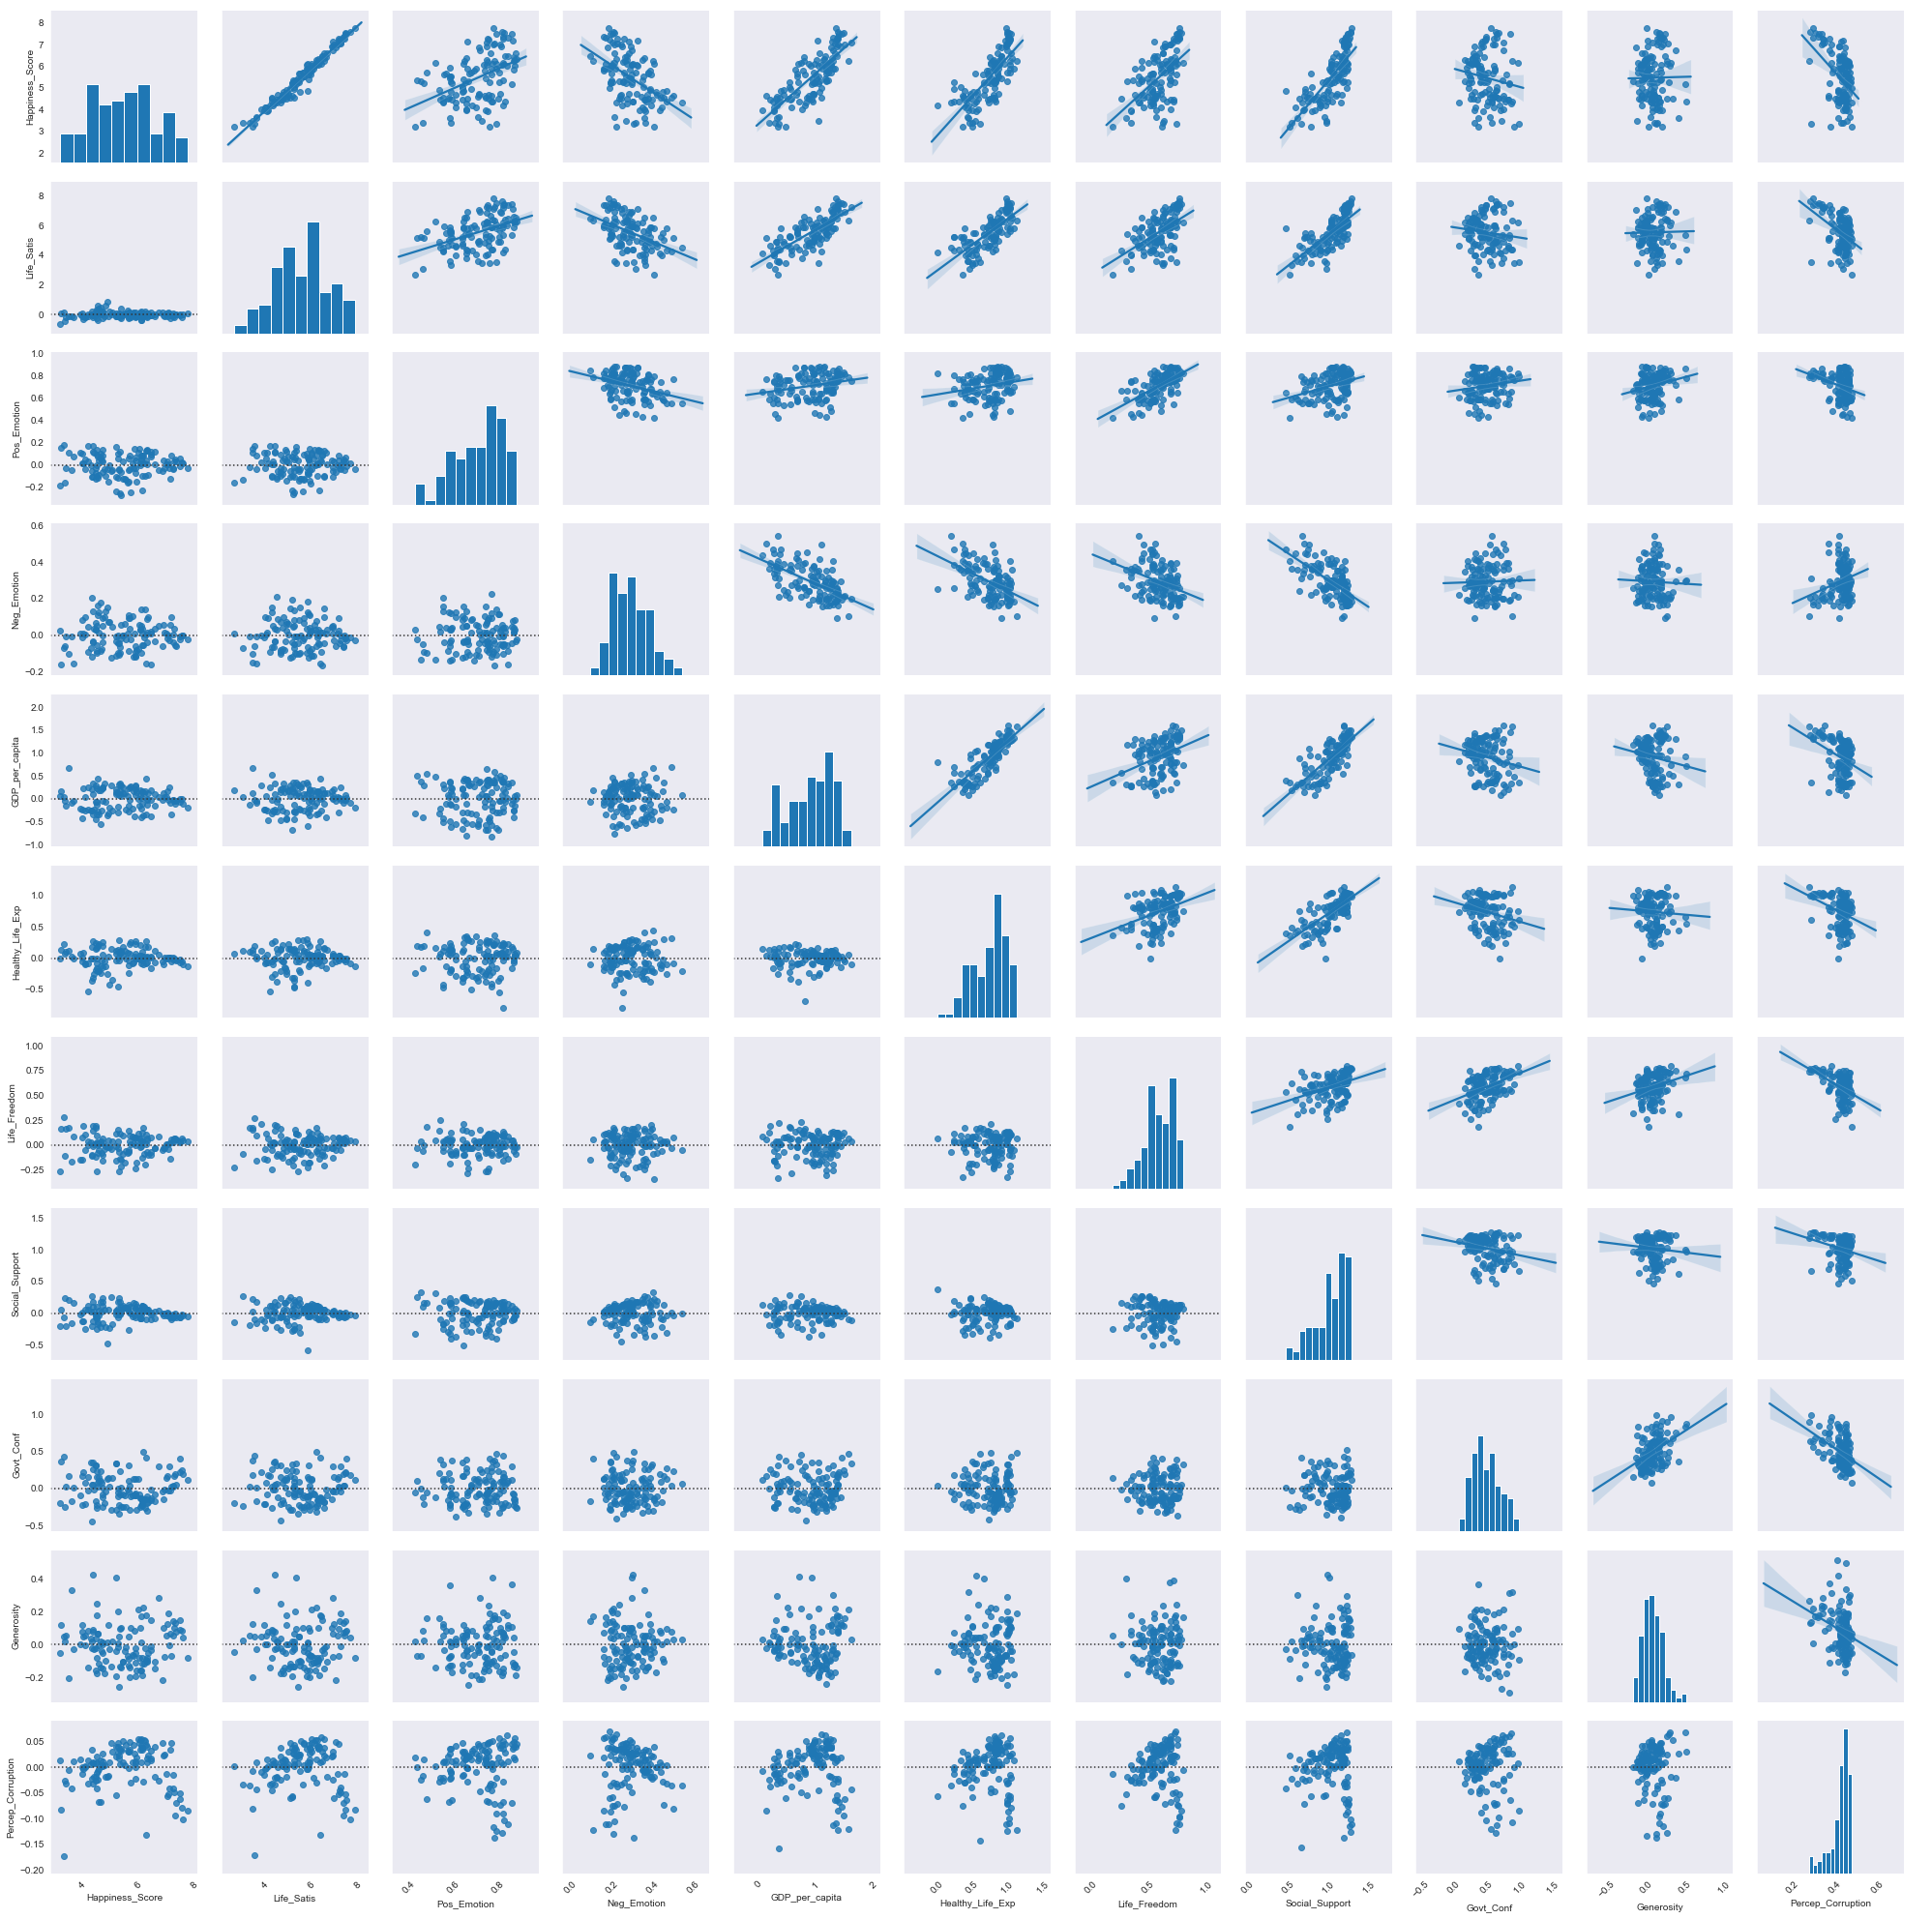

In [772]:
g = sns.PairGrid(df2) 
g.map_upper(sns.regplot) 
g.map_lower(sns.residplot) 
g.map_diag(plt.hist) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)

In [633]:
# check baseline of model with interactions
y = df2['Happiness_Score']
df_variables = df2.iloc[:,2:]

regression = LinearRegression()
crossvalidation = KFold(n_splits=4, shuffle=True, random_state=1)

df_inter = df2.copy()
df_inter["HLE_SS"] = df2["Social_Support"] * df2["Healthy_Life_Exp"]
df_inter["PC_SS"] = df2["Social_Support"] * df2["Percep_Corruption"]
df_inter["NE_SS"] = df2["Social_Support"] * df2["Neg_Emotion"]

model_w_inter = np.mean(cross_val_score(regression, df_inter.iloc[:,2:], y, scoring="r2", cv=crossvalidation))
model_w_inter

# some improvement from the raw baseline R2 of 0.771248561016349

0.8173444484339984

In [634]:
df_inter_sm = sm.add_constant(df_inter.iloc[:,2:])
model = sm.OLS(y, df_inter_sm)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     54.41
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           1.40e-40
Time:                        14:21:11   Log-Likelihood:                -69.269
No. Observations:                 123   AIC:                             164.5
Df Residuals:                     110   BIC:                             201.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.0595      3.253     -0.941      0.349      -9.505       3.386
Pos_Emotion           1.2135      0.508      2.388      0.019       0.206       2.221
Neg_Emotion           5.5143      3.278      1.682      0.095      -0.981      12.010
GDP_per_capita        0.7166      0.249      2.875      0.005       0.223       1.211
Healthy_Life_Exp     -3.6185      1.568     -2.308      0.023      -6.726      -0.511
Life_Freedom          1.8457      0.553      3.336      0.001       0.749       2.942
Social_Support        5.2333      3.001      1.744      0.084      -0.714      11.181
Govt_Conf            -0.8356      0.333     -2.507      0.014      -1.496      -0.175
Generosity            0.1076      0.382      0.281      0.779      -0.650       0.865
Percep_Corruption    11.2886      5.497      2.054      0.042       0.395      22.182
HLE_SS                4.5866      1.558      2.944      0.004       1.499       7.674
PC_SS               -11.9628      4.949     -2.417      0.017     -21.771      -2.154
NE_SS                -4.1885      3.155     -1.328      0.187     -10.441       2.064
==============================================================================
Omnibus:                        7.421   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                7.447
Skew:                          -0.460   Prob(JB):                       0.0241
Kurtosis:                       3.779   Cond. No.                         497.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Normalize Non-Linear Variables

In [635]:
# 'Healthy_Life_Exp','Percep_Corruption' seem to have non-linear relationships with Happiness_Score

Text(0, 0.5, 'Happiness')

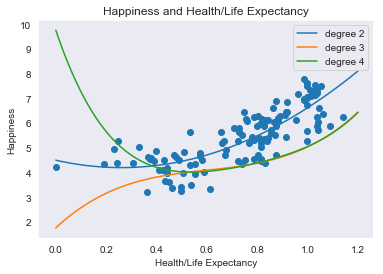

In [888]:
HLE = df2['Healthy_Life_Exp'].values
y = df2['Happiness_Score'].values

poly = PolynomialFeatures(degree=2)
HLE2 = poly.fit_transform(HLE.reshape(-1,1))
HLE3 = PolynomialFeatures(3).fit_transform(SS.reshape(-1,1))
HLE4 = PolynomialFeatures(4).fit_transform(SS.reshape(-1,1))

lr2 = LinearRegression()
lr3 = LinearRegression()
lr4 = LinearRegression()
lr2.fit(HLE2, y)
lr3.fit(HLE3, y)
lr4.fit(HLE4, y)

x_values = np.linspace(0,1.2,num=100)   # 0 to 1.2 is the range of values for Health/Life Expectancy

x2 = poly.fit_transform(x_values.reshape(-1,1))
x3 = PolynomialFeatures(3).fit_transform(x_values.reshape(-1,1))
x4 = PolynomialFeatures(4).fit_transform(x_values.reshape(-1,1))
plt.scatter(HLE,y)
plt.plot(x_values,lr2.predict(x2),label='degree 2')
plt.plot(x_values, lr3.predict(x3),label= 'degree 3')
plt.plot(x_values,lr4.predict(x4),label='degree 4')
plt.title('Happiness and Health/Life Expectancy')
plt.legend()
plt.xlabel('Health/Life Expectancy')
plt.ylabel('Happiness')


# x2 more closely approximate the non-linear relationship

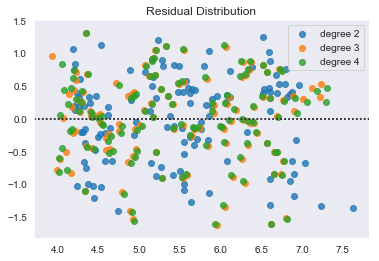

In [889]:
sns.residplot(lr2.predict(HLE2),y, label = 'degree 2')
sns.residplot(lr3.predict(HLE3),y, label = 'degree 3')
sns.residplot(lr4.predict(HLE4),y, label = 'degree 4')
plt.title('Residual Distribution')
plt.legend()
# checking to make sure residual distribution is random

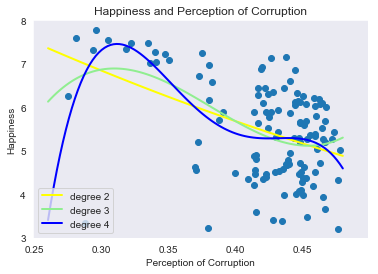

In [891]:
# doing the same for Percep_Corruption 

y = df2['Happiness_Score'].values

# reshaping train x
PC = df2['Percep_Corruption'].values
# pc = PC[:, np.newaxis]           # making it into 2D, 3D, 4D column vectors

colors = ['yellow', 'lightgreen', 'blue']
plt.scatter(PC, y)

# test data
x_plot = np.linspace(0.26,0.48,num=100)
# X_plot = x_plot[:, np.newaxis]

for index, degree in enumerate([2, 3, 4]):
    poly = PolynomialFeatures(degree)
    pc = poly.fit_transform(PC[:, np.newaxis])
    X_plot = poly.fit_transform(x_plot[:, np.newaxis])
    reg_poly = LinearRegression().fit(pc, y)
    y_plot = reg_poly.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[index], linewidth = 2,
             label="degree %d" % degree)
    plt.ylim(3, 8)
    plt.legend(loc='lower left')
plt.title('Happiness and Perception of Corruption')
plt.xlabel('Perception of Corruption')
plt.ylabel('Happiness')
plt.show();

# x3 more closely approximate the non-linear relationship

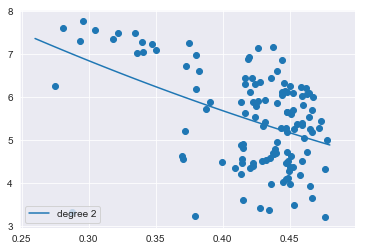

In [456]:
PC = df2['Percep_Corruption'].values
y = df2['Happiness_Score'].values

plt.scatter(PC, y)

x_plot = np.linspace(0.26,0.48,num=100)
X_plot = x_plot[:, np.newaxis] 
pc = PC[:, np.newaxis]

for index, degree in enumerate([2]):
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(pc)
    X_plot = poly.fit_transform(X_plot)
    reg_poly = LinearRegression().fit(X, y)
    y_plot = reg_poly.predict(X_plot)
    plt.plot(x_plot, y_plot, label="degree %d" % degree)
plt.legend(loc='lower left')
plt.show();

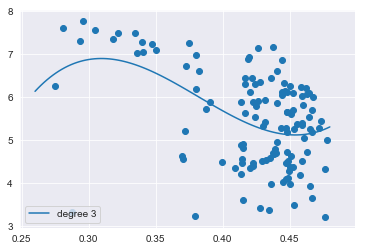

In [457]:
PC = df2['Percep_Corruption'].values
y = df2['Happiness_Score'].values

plt.scatter(PC, y)

x_plot = np.linspace(0.26,0.48,num=100)
X_plot = x_plot[:, np.newaxis] 
pc = PC[:, np.newaxis]

for index, degree in enumerate([3]):
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(pc)
    X_plot = poly.fit_transform(X_plot)
    reg_poly = LinearRegression().fit(X, y)
    y_plot = reg_poly.predict(X_plot)
    plt.plot(x_plot, y_plot, label="degree %d" % degree)
plt.legend(loc='lower left')
plt.show();

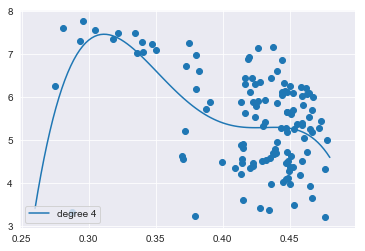

In [458]:
PC = df2['Percep_Corruption'].values
y = df2['Happiness_Score'].values

plt.scatter(PC, y)

x_plot = np.linspace(0.26,0.48,num=100)
X_plot = x_plot[:, np.newaxis] 
pc = PC[:, np.newaxis]

for index, degree in enumerate([4]):
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(pc)
    X_plot = poly.fit_transform(X_plot)
    reg_poly = LinearRegression().fit(X, y)
    y_plot = reg_poly.predict(X_plot)
    plt.plot(x_plot, y_plot, label="degree %d" % degree)
plt.legend(loc='lower left')
plt.show();

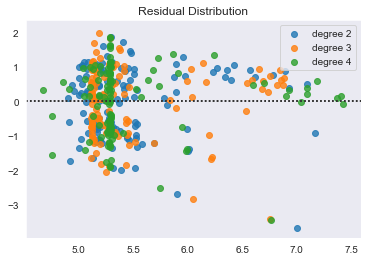

In [892]:
# checking to make sure residual distribution is random

PC = df2['Percep_Corruption'].values
y = df2['Happiness_Score'].values

x_plot = np.linspace(0.26,0.48,num=100)

PC2 = PolynomialFeatures(2).fit_transform(PC.reshape(-1,1))
lr2 = LinearRegression()
lr2.fit(PC2, y)
sns.residplot(lr2.predict(PC2),y, label='degree 2');

PC3 = PolynomialFeatures(3).fit_transform(PC.reshape(-1,1))
lr3 = LinearRegression()
lr3.fit(PC3, y)
sns.residplot(lr3.predict(PC3),y, label='degree 3');

PC4 = PolynomialFeatures(4).fit_transform(PC.reshape(-1,1))
lr4 = LinearRegression()
lr4.fit(PC4, y)
sns.residplot(lr4.predict(PC4),y, label='degree 4');
plt.legend()
plt.title('Residual Distribution');

In [893]:
# model with normalization
y = df2['Happiness_Score']

df_trans = df2.copy()
df_trans["HLE_Squared"] = df2["Healthy_Life_Exp"]**2
df_trans["PC_Squared"] = df2["Percep_Corruption"]**2
df_trans

df_trans_sm = sm.add_constant(df_trans.iloc[:,2:])
model = sm.OLS(y, df_trans_sm)
results = model.fit()

regression = LinearRegression()
crossvalidation = KFold(n_splits=4, shuffle=True, random_state=1)

model_w_trans = np.mean(cross_val_score(regression, df_trans.iloc[:,2:], y, scoring="r2", cv=crossvalidation))

print(model_w_trans)

results.summary()

# it looks like the transformations actually decreased my baseline R2 and Adj. R2
# The transformation of Percep_Corruption did not yield a significant p-value
# I decide to remove the transformation of Percep_Corruption and re-run the model

0.7484647082605809


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     46.81
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           1.44e-36
Time:                        14:48:21   Log-Likelihood:                -82.001
No. Observations:                 123   AIC:                             188.0
Df Residuals:                     111   BIC:                             221.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3581      2.812     -0.127      0.899      -5.930       5.213
Pos_Emotion           0.7537      0.557      1.354      0.178      -0.349       1.857
Neg_Emotion           1.2300      0.723      1.702      0.092      -0.202       2.662
GDP_per_capita        0.7639      0.294      2.600      0.011       0.182       1.346
Healthy_Life_Exp     -1.8620      1.047     -1.778      0.078      -3.937       0.213
Life_Freedom          2.2680      0.612      3.709      0.000       1.056       3.480
Social_Support        1.6433      0.431      3.816      0.000       0.790       2.497
Govt_Conf            -1.2383      0.360     -3.438      0.001      -1.952      -0.525
Generosity            0.5254      0.411      1.277      0.204      -0.290       1.340
Percep_Corruption    14.8474     14.569      1.019      0.310     -14.023      43.718
HLE_Squared           2.0286      0.855      2.374      0.019       0.335       3.722
PC_Squared          -23.9984     18.651     -1.287      0.201     -60.957      12.960
==============================================================================
Omnibus:                        3.035   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.219   Jarque-Bera (JB):                2.576
Skew:                          -0.344   Prob(JB):                        0.276
Kurtosis:                       3.172   Cond. No.                     1.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [650]:
# model with normalization
y = df2['Happiness_Score']

df_trans1 = df2.copy()
df_trans1["HLE_Squared"] = df2["Healthy_Life_Exp"]**2

df_trans1_sm = sm.add_constant(df_trans1.iloc[:,2:])
model = sm.OLS(y, df_trans1_sm)
results = model.fit()

regression = LinearRegression()
crossvalidation = KFold(n_splits=4, shuffle=True, random_state=1)

model_w_trans1 = np.mean(cross_val_score(regression, df_trans1.iloc[:,2:], y, scoring="r2", cv=crossvalidation))

print(model_w_trans1)

results.summary()

# did not improve R2, but it did make the improve the p-values for each variable

0.7518622660010068


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     51.03
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           4.40e-37
Time:                        14:30:21   Log-Likelihood:                -82.912
No. Observations:                 123   AIC:                             187.8
Df Residuals:                     112   BIC:                             218.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.0463      0.954      3.193      0.002       1.156       4.937
Pos_Emotion           0.7959      0.557      1.428      0.156      -0.308       1.900
Neg_Emotion           1.4799      0.698      2.119      0.036       0.096       2.863
GDP_per_capita        0.7919      0.294      2.694      0.008       0.210       1.374
Healthy_Life_Exp     -1.8622      1.050     -1.773      0.079      -3.943       0.219
Life_Freedom          2.2104      0.612      3.614      0.000       0.998       3.422
Social_Support        1.6967      0.430      3.947      0.000       0.845       2.549
Govt_Conf            -1.2100      0.361     -3.356      0.001      -1.924      -0.496
Generosity            0.5414      0.412      1.313      0.192      -0.276       1.358
Percep_Corruption    -3.8120      1.407     -2.709      0.008      -6.600      -1.024
HLE_Squared           1.9972      0.857      2.331      0.022       0.300       3.695
==============================================================================
Omnibus:                        4.191   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                3.634
Skew:                          -0.396   Prob(JB):                        0.163
Kurtosis:                       3.288   Cond. No.                         85.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

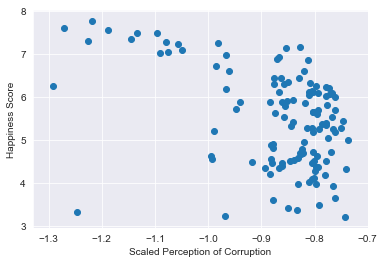

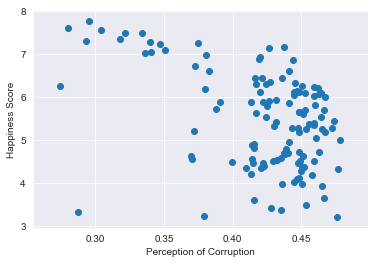

0.7496804436356006


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     50.59
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           6.47e-37
Time:                        14:22:03   Log-Likelihood:                -83.341
No. Observations:                 123   AIC:                             188.7
Df Residuals:                     112   BIC:                             219.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2049      0.802      0.255      0.799      -1.385       1.795
Pos_Emotion           0.8093      0.559      1.448      0.151      -0.298       1.917
Neg_Emotion           1.5249      0.702      2.173      0.032       0.135       2.915
GDP_per_capita        0.7970      0.295      2.702      0.008       0.213       1.382
Healthy_Life_Exp     -1.9068      1.054     -1.810      0.073      -3.994       0.181
Life_Freedom          2.1984      0.614      3.582      0.001       0.982       3.414
Social_Support        1.7067      0.431      3.956      0.000       0.852       2.562
Govt_Conf            -1.1788      0.361     -3.270      0.001      -1.893      -0.464
Generosity            0.5513      0.414      1.333      0.185      -0.268       1.371
Percep_Corruption    -1.3719      0.538     -2.551      0.012      -2.437      -0.306
HLE_Squared           2.0401      0.860      2.372      0.019       0.336       3.744
==============================================================================
Omnibus:                        4.425   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                3.863
Skew:                          -0.407   Prob(JB):                        0.145
Kurtosis:                       3.303   Cond. No.                         80.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [638]:
# what about if I do a semi-log transformation of Percep_Corruption

df_trans2=df_trans1.copy()

df_trans2['Percep_Corruption'] = np.log(df_trans2['Percep_Corruption'])

plt.scatter(df_trans2['Percep_Corruption'],df_trans2['Happiness_Score'])
plt.xlabel('Scaled Perception of Corruption')
plt.ylabel('Happiness Score')
plt.show()

df_trans2_sm = sm.add_constant(df_trans2.iloc[:,2:])
model = sm.OLS(y, df_trans2_sm)
results = model.fit()

regression = LinearRegression()
crossvalidation = KFold(n_splits=4, shuffle=True, random_state=1)

model_w_trans2 = np.mean(cross_val_score(regression, df_trans2.iloc[:,2:], y, scoring="r2", cv=crossvalidation))

print(model_w_trans2)

results.summary()

# NOPE!

# Final Model

In [894]:
# including all the factors tested above 

y = df2['Happiness_Score']

regression = LinearRegression()
crossvalidation = KFold(n_splits=4, shuffle=True, random_state=1)

df_final = df2.copy()
df_final["HLE_SS"] = df_final["Social_Support"] * df_final["Healthy_Life_Exp"]
df_final["PC_SS"] = df_final["Social_Support"] * df_final["Percep_Corruption"]
df_final["HLE_squared"] = df_final["Healthy_Life_Exp"]**2
df_final["PC_squared"] = df_final["Percep_Corruption"]**2


df_final_sm = sm.add_constant(df_final.iloc[:,2:])
model = sm.OLS(y, df_final_sm)
results = model.fit()

regression = LinearRegression()
crossvalidation = KFold(n_splits=4, shuffle=True, random_state=1)

model_final = np.mean(cross_val_score(regression, df_final.iloc[:,2:], y, scoring="r2", cv=crossvalidation))
print('Baseline = ', model_final)
results.summary()

Baseline =  0.7979751741454599


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     51.86
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           1.59e-40
Time:                        14:50:35   Log-Likelihood:                -67.099
No. Observations:                 123   AIC:                             162.2
Df Residuals:                     109   BIC:                             201.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.5030      3.914     -1.917      0.058     -15.260       0.254
Pos_Emotion           1.0716      0.501      2.139      0.035       0.079       2.065
Neg_Emotion           0.8373      0.656      1.276      0.205      -0.463       2.138
GDP_per_capita        0.6978      0.265      2.633      0.010       0.172       1.223
Healthy_Life_Exp     -4.7989      1.325     -3.622      0.000      -7.425      -2.173
Life_Freedom          1.9738      0.550      3.590      0.000       0.884       3.063
Social_Support        3.7936      2.525      1.502      0.136      -1.211       8.798
Govt_Conf            -0.8843      0.329     -2.689      0.008      -1.536      -0.233
Generosity            0.0492      0.379      0.130      0.897      -0.701       0.800
Percep_Corruption    45.2088     15.322      2.950      0.004      14.840      75.577
HLE_SS                5.9506      1.465      4.063      0.000       3.048       8.854
PC_SS               -14.1361      4.987     -2.835      0.005     -24.019      -4.253
HLE_squared          -0.1402      0.877     -0.160      0.873      -1.878       1.597
PC_squared          -40.8019     17.065     -2.391      0.019     -74.623      -6.981
==============================================================================
Omnibus:                        9.137   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.684
Skew:                          -0.521   Prob(JB):                      0.00789
Kurtosis:                       3.898   Cond. No.                     1.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [812]:
# dropping all variables with p-value > 0.05
# dropping variables where the coefficients did not make sense
# dropping 'Generosity', 'Neg_Emotion', 'Social_Support','Percep_Corruption', 'Pos_Emotion', 'NE_SS', and 'HLE_2', and 'PC_2'

df3 = df2.drop(columns=['Generosity', 'Neg_Emotion', 'Social_Support', 'Percep_Corruption', 'Pos_Emotion'])

regression = LinearRegression()
crossvalidation = KFold(n_splits=4, shuffle=True, random_state=1)

df_final1 = df3.copy()
df_final1["HLE_SS"] = df2["Social_Support"] * df2["Healthy_Life_Exp"]
df_final1["PC_SS"] = df2["Social_Support"] * df2["Percep_Corruption"]

df_final1_sm = sm.add_constant(df_final1.iloc[:,2:])
model = sm.OLS(y, df_final1_sm)
results = model.fit()

regression = LinearRegression()
crossvalidation = KFold(n_splits=4, shuffle=True, random_state=1)

model_final1 = np.mean(cross_val_score(regression, df_final1.iloc[:,2:], y, scoring="r2", cv=crossvalidation))
print('Baseline = ', model_final1)
results.summary()

Baseline =  0.8150564377108181


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     99.01
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           2.88e-43
Time:                        10:01:55   Log-Likelihood:                -76.952
No. Observations:                 123   AIC:                             167.9
Df Residuals:                     116   BIC:                             187.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.8207      0.474     10.161      0.000       3.881       5.760
GDP_per_capita       0.6466      0.238      2.722      0.007       0.176       1.117
Healthy_Life_Exp    -4.3559      0.747     -5.833      0.000      -5.835      -2.877
Life_Freedom         2.5230      0.472      5.345      0.000       1.588       3.458
Govt_Conf           -1.2037      0.307     -3.924      0.000      -1.811      -0.596
HLE_SS               5.0095      0.633      7.911      0.000       3.755       6.264
PC_SS               -3.6394      0.792     -4.592      0.000      -5.209      -2.070
==============================================================================
Omnibus:                        8.826   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.655
Skew:                          -0.577   Prob(JB):                       0.0132
Kurtosis:                       3.596   Cond. No.                         55.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Which Variable is the More Important Indicator of Happiness?

In [814]:
happiness_model = LinearRegression(fit_intercept=True).fit(df_final1.iloc[:,2:], y)
r_squared = happiness_model.score(df_final1.iloc[:,2:], y)

predict_default = happiness_model.predict(np.array([[0,0,0,0,0,0]]))

The happiness score is ranked on a scale of 1 to 10. Each variable measured reveals a population-weighted average score on a scale running from 0 to 10. 

In my trained multiple-regression model, with all variables having signficant p-values of < 0.05, ~83.7% of the variability in the Happiness Score can be explained by the following variables:

- y-intercpt of 4.82
- For every 1 point increase in the score of GDP per Capita, Happiness Score goes up by 0.65
- For every 1 point increase in the score of Health and Life Expectancy, Happiness Score goes down by 4.36 
(is this due to increased financial pressure for retirement given longer life? usually high life expectancy countries are more developed countries with stronger economy but also more competitive job market, hence more stressful life)
- For every 1 point increase in the score of Freedom, Happiness Score goes up by 2.52
- For every 1 point increase in the score of Government Confidence, Happiness Score goes down by 1.20 
(is this because when people have higher confidence in their government, they tend to expect more from their governments and hence are disappointed purely from higher expectations?)
- Health and Life Expectancy in high Social Support environments increases Happiness Score by 5.01 than that in low Social Support environments
- Perception of Corruption in high Social Support environments lowers Happiness Score by 3.64 than that in low Social Support environments 
(is this due to expectations? people in low social support countries tend to perceive their governments as more corrupt, and therefore it is within their expectations and does not create as dramatic of a decrease in happiness as those in high social support environments?)


# Validating My Model

In [788]:
df2017 = pd.read_csv('ObservationData_2017.csv')
df2017

,country,indicator,Unit,Date,Value
0,Afghanistan,GDP per capita,score,2017,0.331814
1,Afghanistan,Social support,score,2017,0.537191
2,Afghanistan,Happiness Score,"Scale, 0=Low ; 10=High",2017,3.631500
3,Afghanistan,Healthy life expectancy,score,2017,0.254772
4,Afghanistan,Dystopia (1.88) + residual,score,2017,2.195918
5,Afghanistan,Whisker-high,score,2017,3.714525
6,Afghanistan,Whisker-low,score,2017,3.548475
7,Afghanistan,Freedom to make life choices,score,2017,0.084552
8,Afghanistan,Generosity,score,2017,0.191004
9,Afghanistan,Perceptions of corruption,score,2017,0.036268


In [789]:
# rearrange the database schema
df1 = df2017.pivot_table(index='country', columns='indicator', values='Value')
df1

indicator,Confidence in national government,Delivery Quality,Democratic Quality,Dystopia (1.88) + residual,Freedom to make life choices,GDP per capita,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16",Generosity,Happiness Score,...,"Most people can be trusted, WVS round 2010-2014",Negative affect,Perceptions of corruption,Positive affect,Social support,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Whisker-high,Whisker-low,"gini of household income reported in Gallup, by wp5-year"
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.261179,-1.437808,-1.886566,2.195918,0.255781,0.331814,NaN,NaN,0.039403,3.6315,...,NaN,0.371326,0.495330,0.496349,0.514036,1.454051,0.546283,3.714525,3.548475,0.286599
Albania,0.457738,-0.130315,0.299945,1.462148,0.584140,0.915782,NaN,0.303250,0.058285,4.5860,...,NaN,0.333884,0.454285,0.669241,0.727551,2.682105,0.578096,4.695393,4.476607,0.410488
Algeria,NaN,-0.816839,-0.927691,2.208535,0.256975,0.978857,NaN,0.276000,-0.068164,5.2946,...,0.179286,0.288710,0.417145,0.641980,0.980205,2.039765,0.388607,5.406491,5.182709,0.527556
Angola,NaN,NaN,NaN,1.530531,0.000000,0.730157,NaN,NaN,0.078868,3.7948,...,NaN,NaN,0.061276,NaN,1.125020,NaN,NaN,3.951442,3.638158,NaN
Argentina,0.305430,-0.158056,0.351304,2.418201,0.700838,1.072671,NaN,0.460938,-0.060329,6.3880,...,0.193531,0.291717,0.447280,0.809423,1.187520,2.409329,0.398940,6.485014,6.290986,0.394176
Armenia,0.246901,-0.132939,-0.633139,1.482994,0.436898,0.816387,NaN,0.319250,-0.028453,4.3206,...,0.109136,0.437149,0.446163,0.625014,0.844062,2.325379,0.542333,4.411935,4.229265,0.478877
Australia,0.453407,1.735672,1.140084,2.139236,0.778538,1.339951,NaN,0.342750,0.334889,7.2721,...,0.518140,0.225361,0.356849,0.780079,1.261247,1.745699,0.240553,7.358463,7.185737,0.428341
Austria,0.435908,1.559313,1.189481,2.319478,0.753636,1.341352,NaN,0.302692,0.186563,7.1394,...,NaN,0.180269,0.371062,0.747569,1.205160,1.561062,0.214028,7.209448,7.069352,0.322942
Azerbaijan,0.766583,-0.461928,-1.162633,1.775566,0.580437,1.024018,NaN,0.211000,-0.107154,5.2006,...,0.147933,0.198319,0.414515,0.592359,0.973965,1.673757,0.324858,5.269876,5.131325,0.313743


In [790]:
df1.columns

Index(['Confidence in national government', 'Delivery Quality',
       'Democratic Quality', 'Dystopia (1.88) + residual',
       'Freedom to make life choices', 'GDP per capita',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16', 'Generosity',
       'Happiness Score', 'Healthy life expectancy',
       'Healthy life expectancy at birth', 'Life Ladder', 'Log GDP per capita',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS round 2010-2014', 'Negative affect',
       'Perceptions of corruption', 'Positive affect', 'Social support',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year', 'Whisker-high',

In [791]:
# dropping columns not needed for analysis
df_2017 = df1.drop(columns=['Delivery Quality',
       'Democratic Quality', 'Dystopia (1.88) + residual',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'Healthy life expectancy at birth', 'Log GDP per capita',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS round 2010-2014', 
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year', 'Whisker-high',
       'Whisker-low',
       'gini of household income reported in Gallup, by wp5-year'])
df_2017

indicator,Confidence in national government,Freedom to make life choices,GDP per capita,Generosity,Happiness Score,Healthy life expectancy,Life Ladder,Negative affect,Perceptions of corruption,Positive affect,Social support
country,,,,,,,,,,,
Afghanistan,0.261179,0.255781,0.331814,0.039403,3.6315,0.254772,2.661718,0.371326,0.495330,0.496349,0.514036
Albania,0.457738,0.584140,0.915782,0.058285,4.5860,0.790387,4.639548,0.333884,0.454285,0.669241,0.727551
Algeria,NaN,0.256975,0.978857,-0.068164,5.2946,0.686599,5.248912,0.288710,0.417145,0.641980,0.980205
Angola,NaN,0.000000,0.730157,0.078868,3.7948,0.268986,NaN,NaN,0.061276,NaN,1.125020
Argentina,0.305430,0.700838,1.072671,-0.060329,6.3880,0.743585,6.039330,0.291717,0.447280,0.809423,1.187520
Armenia,0.246901,0.436898,0.816387,-0.028453,4.3206,0.666189,4.287736,0.437149,0.446163,0.625014,0.844062
Australia,0.453407,0.778538,1.339951,0.334889,7.2721,0.910445,7.257038,0.225361,0.356849,0.780079,1.261247
Austria,0.435908,0.753636,1.341352,0.186563,7.1394,0.891358,7.293728,0.180269,0.371062,0.747569,1.205160
Azerbaijan,0.766583,0.580437,1.024018,-0.107154,5.2006,0.602876,5.152279,0.198319,0.414515,0.592359,0.973965


In [792]:
# renaming and rearranging columns
df_2017.columns = ['Govt_Conf', 'Life_Freedom', 'GDP_per_capita', 'Generosity', 'Happiness_Score', 'Healthy_Life_Exp', 'Life_Satis', 'Neg_Emotion', 'Percep_Corruption', 'Pos_Emotion', 'Social_Support']
df_2017 = df_2017[['Happiness_Score', 'Life_Satis', 'Pos_Emotion', 'Neg_Emotion', 'GDP_per_capita', 'Healthy_Life_Exp', 'Life_Freedom', 'Social_Support', 'Govt_Conf','Generosity', 'Percep_Corruption' ]]

In [794]:
df_2017 = df_2017.dropna(axis=0)
df_2017.isnull().sum()

Happiness_Score      0
Life_Satis           0
Pos_Emotion          0
Neg_Emotion          0
GDP_per_capita       0
Healthy_Life_Exp     0
Life_Freedom         0
Social_Support       0
Govt_Conf            0
Generosity           0
Percep_Corruption    0
dtype: int64

In [821]:
df_2017['HLE_SS'] = df_2017['Healthy_Life_Exp'] * df_2017['Social_Support']
df_2017['PC_SS'] = df_2017['Percep_Corruption'] * df_2017['Social_Support']
df_x_2017 = df_2017[['GDP_per_capita', 'Healthy_Life_Exp', 'Life_Freedom', 'Govt_Conf', 'HLE_SS', 'PC_SS']]
df_y_2017 = df_2017[['Happiness_Score']]

In [822]:
list(map(list, df_x_2017.values))

[[0.331814259290695,
  0.254771560430527,
  0.2557813189923763,
  0.26117852330207797,
  0.13096167785228388,
  0.25461736845117844],
 [0.9157823324203491,
  0.790387153625488,
  0.584140181541443,
  0.457737535238266,
  0.5750473513511735,
  0.33051580285057774],
 [1.07267069816589,
  0.743585169315338,
  0.7008382081985469,
  0.30543029308319103,
  0.8830224799066875,
  0.5311538111380005],
 [0.816387414932251,
  0.6661890149116519,
  0.4368983954191205,
  0.24690099060535398,
  0.5623051503098416,
  0.37658964956318747],
 [1.33995127677917,
  0.910444676876068,
  0.77853798866272,
  0.45340695977211,
  1.148295707005449,
  0.45007502877074645],
 [1.34135162830353,
  0.891358375549316,
  0.7536363899707794,
  0.4359079301357271,
  1.0742291605179137,
  0.4471888422786836],
 [1.0240182876586899,
  0.6028764247894289,
  0.58043697476387,
  0.766583442687988,
  0.5871807461555395,
  0.4037236265470936],
 [0.532337546348572,
  0.578533232212067,
  0.737924784421921,
  0.876646459102631,


In [823]:
df_y_2017['Pred_Score'] = happiness_model.predict(list(map(list, df_x_2017.values)))

In [849]:
df_y_2017['Error'] = df_y_2017['Pred_Score'] - df_y_2017['Happiness_Score']
df_y_2017['Margin_of_Error'] = round(df_y_2017['Error'] / df_y_2017['Happiness_Score'],2)
df_y_2017_sorted = df_y_2017.sort_values('Margin_of_Error')
df_y_2017_sorted

,Happiness_Score,Pred_Score,Error,Margin of Error,Margin_of_Error
country,,,,,
Tajikistan,5.3525,4.415662,-0.936838,-0.175028,-0.18
Pakistan,5.4725,4.509575,-0.962925,-0.175957,-0.18
Israel,7.1900,6.199505,-0.990495,-0.137760,-0.14
Moldova,5.6397,4.888199,-0.751501,-0.133252,-0.13
Guatemala,6.3819,5.572576,-0.809324,-0.126815,-0.13
El Salvador,6.1668,5.454569,-0.712231,-0.115494,-0.12
South Korea,5.8749,5.194391,-0.680509,-0.115833,-0.12
Mexico,6.4882,5.798007,-0.690193,-0.106377,-0.11
Nicaragua,6.1410,5.530155,-0.610845,-0.099470,-0.10


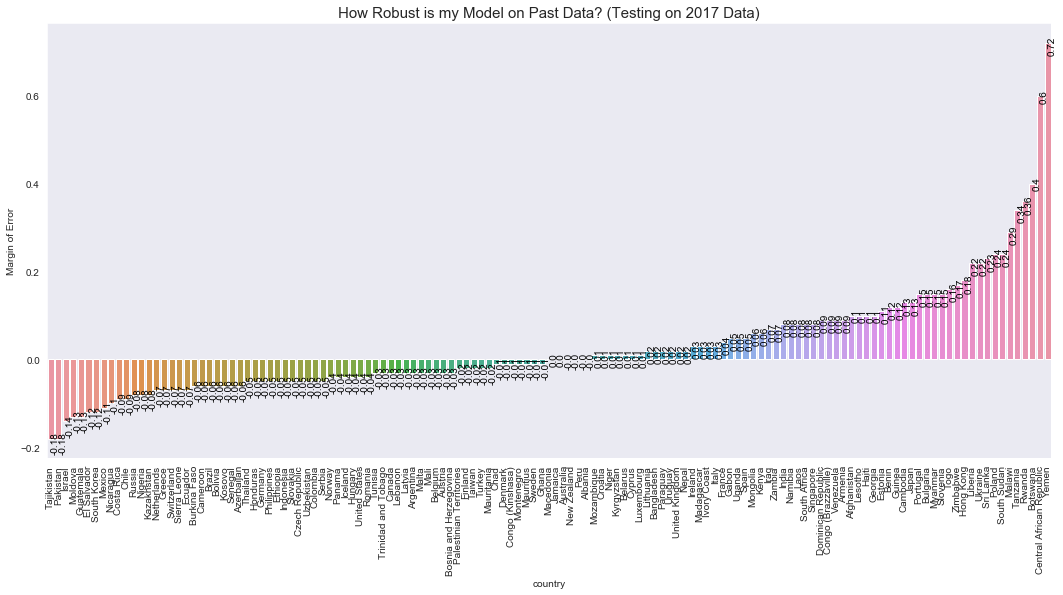

In [869]:
plt.figure(figsize=(18,8))
ax = sns.barplot(x=df_y_2017_sorted.index, y="Margin_of_Error", data=df_y_2017_sorted)
for i, v in enumerate(df_y_2017_sorted["Margin_of_Error"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='black', rotation=90)
plt.xticks(rotation=90)
plt.ylabel('Margin of Error')
plt.title('How Robust is my Model on Past Data? (Testing on 2017 Data)', fontsize=15)
plt.show();

In [856]:
df2016 = pd.read_csv('ObservationData_2016.csv')
df2016

,country,indicator,Unit,Date,Value
0,Afghanistan,GDP per capita,score,2016,0.401477
1,Afghanistan,Social support,score,2016,0.581543
2,Afghanistan,Happiness Score,"Scale, 0=Low ; 10=High",2016,3.794000
3,Afghanistan,Healthy life expectancy,score,2016,0.180747
4,Afghanistan,Dystopia (1.88) + residual,score,2016,2.150801
5,Afghanistan,Whisker-high,score,2016,3.873661
6,Afghanistan,Whisker-low,score,2016,3.714338
7,Afghanistan,Freedom to make life choices,score,2016,0.106180
8,Afghanistan,Generosity,score,2016,0.311871
9,Afghanistan,Perceptions of corruption,score,2016,0.061158


In [857]:
# rearrange the database schema
df1 = df2016.pivot_table(index='country', columns='indicator', values='Value')
df1

indicator,Confidence in national government,Delivery Quality,Democratic Quality,Dystopia (1.88) + residual,Freedom to make life choices,GDP per capita,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16",Generosity,Happiness Score,...,"Most people can be trusted, WVS round 2010-2014",Negative affect,Perceptions of corruption,Positive affect,Social support,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Whisker-high,Whisker-low,"gini of household income reported in Gallup, by wp5-year"
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.324990,-1.392713,-1.855426,2.150801,0.314373,0.401477,NaN,NaN,0.181618,3.794,...,NaN,0.348332,0.427202,0.564953,0.570308,1.796219,0.425627,3.873661,3.714338,0.418629
Albania,0.400910,-0.134950,0.257292,1.490442,0.555659,0.996193,NaN,0.303250,0.090313,4.644,...,NaN,0.321706,0.470467,0.675244,0.721048,2.646668,0.586701,4.752464,4.535536,0.416540
Algeria,NaN,-0.815911,-0.976652,2.567604,0.233336,1.091864,NaN,0.276000,0.069437,5.872,...,0.179286,0.377112,0.146096,0.660510,0.947403,2.114553,0.395920,5.978286,5.765714,0.604617
Angola,NaN,NaN,NaN,1.614482,0.000000,0.858428,NaN,NaN,0.097926,3.795,...,NaN,NaN,0.069720,NaN,1.104412,NaN,NaN,3.951642,3.638358,NaN
Argentina,0.419562,-0.243653,0.348582,2.614005,0.671111,1.185295,0.424,0.460938,-0.039423,6.599,...,0.193531,0.311646,0.455332,0.841907,1.161635,2.127109,0.330953,6.690085,6.507915,0.332071
Armenia,0.184713,-0.147838,-0.620788,1.521499,0.404645,0.900597,0.325,0.319250,-0.036880,4.376,...,0.109136,0.437228,0.474048,0.593600,0.858351,2.126364,0.491591,4.466735,4.285265,0.381564
Australia,0.452732,1.759353,1.199454,2.065211,0.761962,1.484415,NaN,0.342750,0.353746,7.284,...,0.518140,0.236086,0.349864,0.790868,1.226188,1.698828,0.234318,7.356651,7.211349,0.520914
Austria,0.432638,1.579038,1.123497,2.138506,0.728140,1.487097,NaN,0.302692,0.197316,7.006,...,NaN,0.197424,0.372351,0.755903,1.193132,1.704400,0.241825,7.070670,6.941330,0.292294
Azerbaijan,0.734052,-0.449872,-1.183456,1.762482,0.555365,1.153602,NaN,0.211000,-0.089554,5.234,...,0.147933,0.191117,0.393879,0.597593,0.964836,1.613182,0.304150,5.299287,5.168714,0.288716


In [858]:
df1.columns

Index(['Confidence in national government', 'Delivery Quality',
       'Democratic Quality', 'Dystopia (1.88) + residual',
       'Freedom to make life choices', 'GDP per capita',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16', 'Generosity',
       'Happiness Score', 'Healthy life expectancy',
       'Healthy life expectancy at birth', 'Life Ladder', 'Log GDP per capita',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS round 2010-2014', 'Negative affect',
       'Perceptions of corruption', 'Positive affect', 'Social support',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year', 'Whisker-high',

In [860]:
# dropping columns not needed for analysis
df_2016 = df1.drop(columns=['Delivery Quality',
       'Democratic Quality', 'Dystopia (1.88) + residual',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'Healthy life expectancy at birth', 'Log GDP per capita',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS round 2010-2014', 
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year', 'Whisker-high',
       'Whisker-low',
       'gini of household income reported in Gallup, by wp5-year'])
df_2016

indicator,Confidence in national government,Freedom to make life choices,GDP per capita,Generosity,Happiness Score,Healthy life expectancy,Life Ladder,Negative affect,Perceptions of corruption,Positive affect,Social support
country,,,,,,,,,,,
Afghanistan,0.324990,0.314373,0.401477,0.181618,3.794,0.180747,4.220169,0.348332,0.427202,0.564953,0.570308
Albania,0.400910,0.555659,0.996193,0.090313,4.644,0.731160,4.511101,0.321706,0.470467,0.675244,0.721048
Algeria,NaN,0.233336,1.091864,0.069437,5.872,0.617585,5.340854,0.377112,0.146096,0.660510,0.947403
Angola,NaN,0.000000,0.858428,0.097926,3.795,0.049869,NaN,NaN,0.069720,NaN,1.104412
Argentina,0.419562,0.671111,1.185295,-0.039423,6.599,0.695137,6.427221,0.311646,0.455332,0.841907,1.161635
Armenia,0.184713,0.404645,0.900597,-0.036880,4.376,0.637524,4.325472,0.437228,0.474048,0.593600,0.858351
Australia,0.452732,0.761962,1.484415,0.353746,7.284,0.843887,7.250080,0.236086,0.349864,0.790868,1.226188
Austria,0.432638,0.728140,1.487097,0.197316,7.006,0.815328,7.048072,0.197424,0.372351,0.755903,1.193132
Azerbaijan,0.734052,0.555365,1.153602,-0.089554,5.234,0.540776,5.303895,0.191117,0.393879,0.597593,0.964836


In [861]:
# renaming and rearranging columns
df_2016.columns = ['Govt_Conf', 'Life_Freedom', 'GDP_per_capita', 'Generosity', 'Happiness_Score', 'Healthy_Life_Exp', 'Life_Satis', 'Neg_Emotion', 'Percep_Corruption', 'Pos_Emotion', 'Social_Support']
df_2016 = df_2016[['Happiness_Score', 'Life_Satis', 'Pos_Emotion', 'Neg_Emotion', 'GDP_per_capita', 'Healthy_Life_Exp', 'Life_Freedom', 'Social_Support', 'Govt_Conf','Generosity', 'Percep_Corruption' ]]

In [862]:
df_2016 = df_2016.dropna(axis=0)
df_2016.isnull().sum()

Happiness_Score      0
Life_Satis           0
Pos_Emotion          0
Neg_Emotion          0
GDP_per_capita       0
Healthy_Life_Exp     0
Life_Freedom         0
Social_Support       0
Govt_Conf            0
Generosity           0
Percep_Corruption    0
dtype: int64

In [863]:
df_2016['HLE_SS'] = df_2016['Healthy_Life_Exp'] * df_2016['Social_Support']
df_2016['PC_SS'] = df_2016['Percep_Corruption'] * df_2016['Social_Support']
df_x_2016 = df_2016[['GDP_per_capita', 'Healthy_Life_Exp', 'Life_Freedom', 'Govt_Conf', 'HLE_SS', 'PC_SS']]
df_y_2016 = df_2016[['Happiness_Score']]

In [864]:
list(map(list, df_x_2016.values))

[[0.401477217674255,
  0.18074677884578697,
  0.314372859895229,
  0.32498955726623496,
  0.1030812531226415,
  0.24363635153124313],
 [0.996192753314972,
  0.731159746646881,
  0.5556587874889375,
  0.40090981125831604,
  0.5272015326369227,
  0.3392298132552476],
 [1.18529546260834,
  0.695137083530426,
  0.6711107045412066,
  0.41956183314323403,
  0.8074956568422479,
  0.5289298677827602],
 [0.900596737861633,
  0.637524425983429,
  0.40464510768652,
  0.184713035821915,
  0.5472197425960792,
  0.40689935890205675],
 [1.4844149351120002,
  0.84388679265976,
  0.7619615495204926,
  0.45273175835609397,
  1.0347639373570336,
  0.4289995901323976],
 [1.4870972633361799,
  0.8153284192085269,
  0.7281400859355924,
  0.432638227939606,
  0.9727942437442023,
  0.44426342505793504],
 [1.1536017656326298,
  0.5407757759094239,
  0.55536450445652,
  0.734052121639252,
  0.5217597438838775,
  0.38002865318049617],
 [0.586682975292206,
  0.533241033554077,
  0.676528573036194,
  0.84542906284

In [865]:
df_y_2016['Pred_Score'] = happiness_model.predict(list(map(list, df_x_2016.values)))

In [866]:
df_y_2016['Error'] = df_y_2016['Pred_Score'] - df_y_2016['Happiness_Score']
df_y_2016['Margin_of_Error'] = round(df_y_2016['Error'] / df_y_2016['Happiness_Score'],2)
df_y_2016_sorted = df_y_2016.sort_values('Margin_of_Error')
df_y_2016_sorted

,Happiness_Score,Pred_Score,Error,Margin_of_Error
country,,,,
Pakistan,5.269,4.312196,-0.956805,-0.18
Israel,7.213,5.941960,-1.271039,-0.18
Nicaragua,6.071,5.036967,-1.034033,-0.17
Guatemala,6.454,5.349775,-1.104225,-0.17
Moldova,5.838,4.852432,-0.985568,-0.17
Mexico,6.578,5.547761,-1.030239,-0.16
Chile,6.652,5.658404,-0.993596,-0.15
Russia,5.963,5.121233,-0.841767,-0.14
Sierra Leone,4.709,4.080305,-0.628695,-0.13


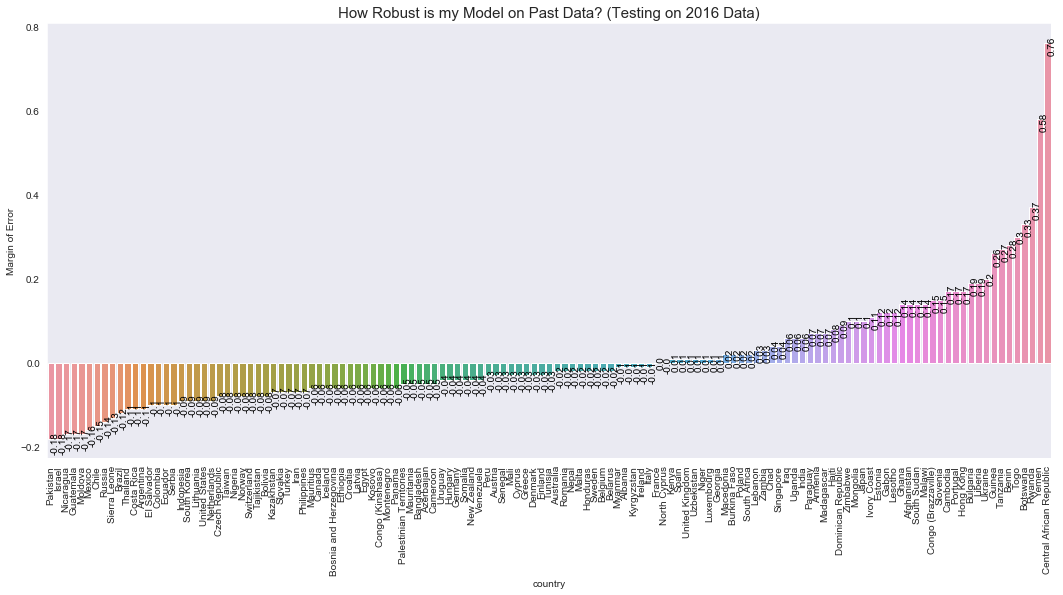

In [870]:
plt.figure(figsize=(18,8))
ax = sns.barplot(x=df_y_2016_sorted.index, y="Margin_of_Error", data=df_y_2016_sorted)
for i, v in enumerate(df_y_2016_sorted["Margin_of_Error"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='black', rotation=90)
plt.xticks(rotation=90)
plt.ylabel('Margin of Error')
plt.title('How Robust is my Model on Past Data? (Testing on 2016 Data)', fontsize=15)
plt.show();